# Modeller
All baselines are run on the same test set i.e. a subset of the original data set. 
The baselines included in this script are:
- Random model - choosing and ranking candidates randomly from the test set
- Plain Mergesort model - choosing and ranking candidates from the test set based on best grades in high school
- Mergesort w. gender accountability - choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking)
- Plain Xgboost regression model -
- Xgboost regression model without sensitive attributes - 

Fair model:
- Xgboost regression model account for diversity 


In [15]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
import random 
from sklearn.utils import shuffle


## Plots setup


In [16]:

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (12,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()



## Load dataset


In [17]:
df = pd.read_csv("X_test_STRATUM_y_test.csv")
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})
df_for_Mergesort_single = df
df_new = pd.read_csv("NEW_X_test_y_test.csv") # this is just one df
df_new = pd.concat([df_new, df.STRATUM], axis=1)
df = df_new.copy()

In [18]:
# NEW AND BIG DATASET OF X_TEST AND Y_TEST
df = pd.read_csv("X_test_STRATUM_y_test.csv") 
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})
df_new = pd.read_csv('dfs_test199 copy 3.csv')
df_new = pd.concat([df_new, df.STRATUM], axis=1)
df = df_new.copy()
dfs_test  = df_new.copy()

dfs_test_use = np.array_split(dfs_test, 200)

In [19]:
# PLAIN = pd.read_csv('TWO_samlet_preds_index_ny_PLAIN.csv')
# TWO_PLAIN_w_IDX = pd.concat([ df_new['18'],PLAIN], axis=1, sort=False)



# Mergesort Ranker


In [20]:
# ENKELT HERUNDER
# df_sort = df_for_Mergesort_single.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})
# GUDF_1['INDEXES'] = GUDF_1['Unnamed: 0'] 


# MERGESORT HERUNDER PÅ BIG 
X_test_y_test_FULL = pd.DataFrame()
for i in range(200):
    dfs_test_use[i]= dfs_test_use[i].sort_values(by="3", ascending=False, kind="mergesort")
    dfs_test_use[i]= dfs_test_use[i].reset_index()
    X_test_y_test_FULL = X_test_y_test_FULL.append(dfs_test_use[i])
# X_test_y_test_FULL

# X_test_y_test_FULL=X_test_y_test_FULL.index.names = ['INDEXES']


X_test_y_test_FULL=X_test_y_test_FULL.drop(['STRATUM'], axis=1)



In [21]:
X_test_y_test_FULL

,index,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1784,11864,81,100,93,97.666667,1,0,0,0,0,0,1,0,1,0,0,0,1,0,98.666667
1,3721,4874,97,100,90,96.666667,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.333333
2,1989,1089,100,100,90,95.000000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.000000
3,3830,4900,81,95,91,93.666667,0,0,0,1,0,0,0,0,0,0,0,1,0,1,96.333333
4,2332,2607,89,89,96,93.333333,0,0,0,0,1,0,0,0,1,0,0,0,1,0,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,818923,1195,47,32,35,37.333333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,45.000000
4092,818192,9686,63,36,35,36.333333,1,0,1,0,0,0,0,0,0,0,0,1,0,1,20.000000
4093,818709,1909,47,36,42,36.333333,0,0,1,0,0,0,0,0,1,0,0,0,1,0,7.000000
4094,817295,3588,53,24,35,33.666667,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17.000000


In [22]:
X_test_y_test_FULL['index_real'] = X_test_y_test_FULL.index

In [23]:
df_en = X_test_y_test_FULL.copy()

In [24]:
X_test_y_test_FULL=X_test_y_test_FULL.merge(GUDF_1[['Unnamed: 0','STRATUM','GENDER']], how='left',on='Unnamed: 0',sort=False)

X_test_y_test_FULL

,index,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,index_real,STRATUM,GENDER
0,1784,11864,81,100,93,97.666667,1,0,0,0,0,0,1,0,1,0,0,0,1,0,98.666667,0,5,F
1,3721,4874,97,100,90,96.666667,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.333333,1,3,M
2,1989,1089,100,100,90,95.000000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.000000,2,3,M
3,3830,4900,81,95,91,93.666667,0,0,0,1,0,0,0,0,0,0,0,1,0,1,96.333333,3,2,M
4,2332,2607,89,89,96,93.333333,0,0,0,0,1,0,0,0,1,0,0,0,1,0,98.000000,4,3,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819195,818923,1195,47,32,35,37.333333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,45.000000,4091,2,M
819196,818192,9686,63,36,35,36.333333,1,0,1,0,0,0,0,0,0,0,0,1,0,1,20.000000,4092,1,F
819197,818709,1909,47,36,42,36.333333,0,0,1,0,0,0,0,0,1,0,0,0,1,0,7.000000,4093,1,M
819198,817295,3588,53,24,35,33.666667,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17.000000,4094,1,M


In [25]:
de_første = np.arange(0,200)
X_test_y_test_FULL_første = X_test_y_test_FULL.loc[X_test_y_test_FULL['index_real'].isin(de_første)]
X_test_y_test_FULL_første.STRATUM.value_counts(normalize=True)*100

3    29.5675
4    24.6150
5    15.1650
2    14.5100
6    13.3375
1     2.8050
Name: STRATUM, dtype: float64

In [26]:

X_test_y_test_FULL_std = X_test_y_test_FULL.groupby('index_real').std()/np.sqrt(200) #df with standard deviations of all columns in full df
X_test_y_test_FULL_mean=  X_test_y_test_FULL.groupby('index_real').mean() #means of all columns


X_test_y_test_FULL_mean["incr_col_mean"] = X_test_y_test_FULL_mean['18'].expanding().mean() #expanding mean of n of the means
X_test_y_test_FULL_std["incr_col_mean"] = X_test_y_test_FULL_std['18'].expanding().mean()
X_test_y_test_FULL_mean["incr_stratum"] = X_test_y_test_FULL_mean['STRATUM'].expanding().mean()

df_sort_BIG =X_test_y_test_FULL_mean

In [27]:
#Adding standard deviation column for "incr_col_mean" and variables for plotting 200.
df_sort_BIG["incr_half_std"] = 0.5*X_test_y_test_FULL_std["incr_col_mean"] #0.5 of std to plot on both sides of mean
df_sort_BIG["lower_std"] = df_sort_BIG["incr_col_mean"] - df_sort_BIG["incr_half_std"]
df_sort_BIG["upper_std"] = df_sort_BIG["incr_col_mean"] + df_sort_BIG["incr_half_std"]

## Mergesort utility


findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


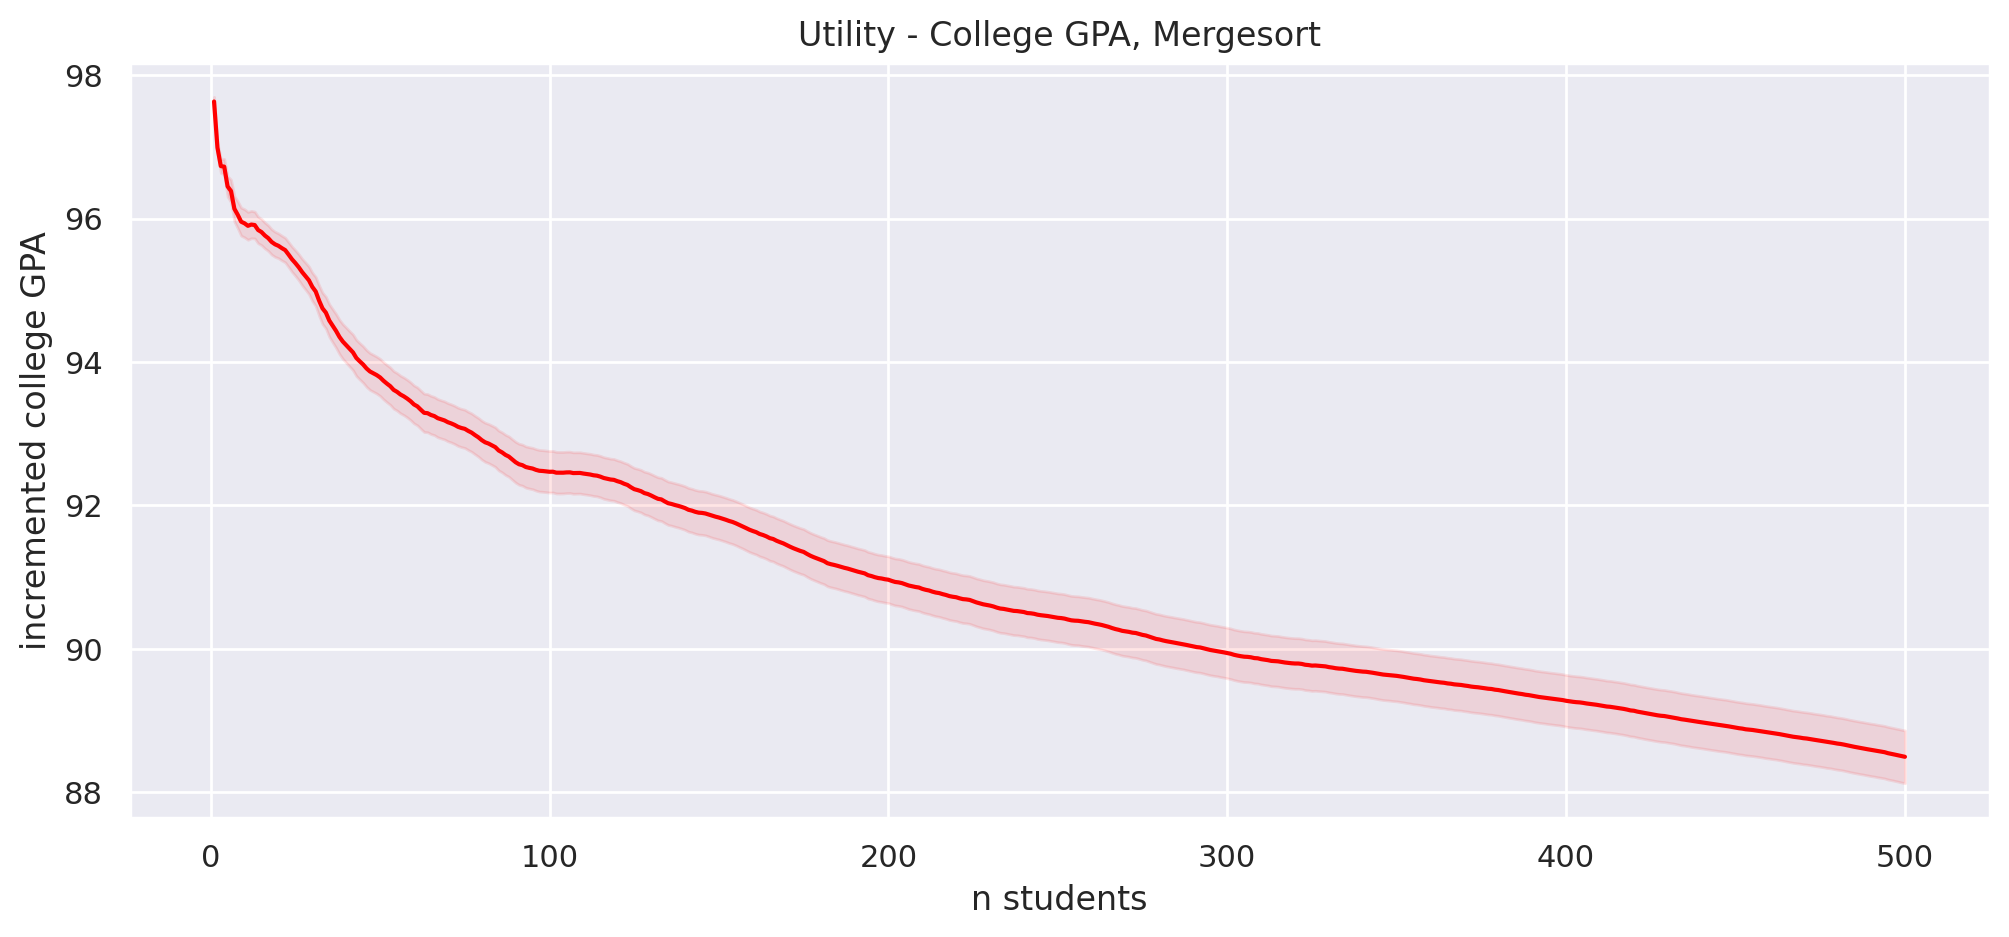

In [28]:
# #mergesort 1 df
# df_avg = df_sort.copy()
# df_avg["incr_col_mean"] = df_avg['COL_GRADE_AVG']#.rolling(10).mean()#.expanding().mean()
# df_avg["n_students"] = range(1,len(df_avg)+1)
# sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color="orange").set_title("Utility - College GPA, Mergesort")

#mergesort 200 dfs
df_sort_BIG["n_students"] = range(1,len(df_sort_BIG)+1)
sns.lineplot(x="n_students", y="incr_col_mean", data=df_sort_BIG[:500], color="red").set_title("Utility - College GPA, Mergesort")

#std 200 dfs:
plt.fill_between("n_students", "lower_std", "upper_std",data=df_sort_BIG[:500], alpha=0.1, color="red")

#alternative if errors above:
#plt.plot(df_sort_BIG["n_students"][0:500], df_sort_BIG["lower_std"][0:500], color='tab:red', alpha=0.1)
#plt.plot(df_sort_BIG["n_students"][0:500], df_sort_BIG["upper_std"][0:500][0:500], color='tab:red', alpha=0.1)
#plt.fill_between(df_sort_BIG["n_students"][0:500], df_sort_BIG["lower_std"][0:500], df_sort_BIG["upper_std"][0:500], alpha=0.2)


plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.show()

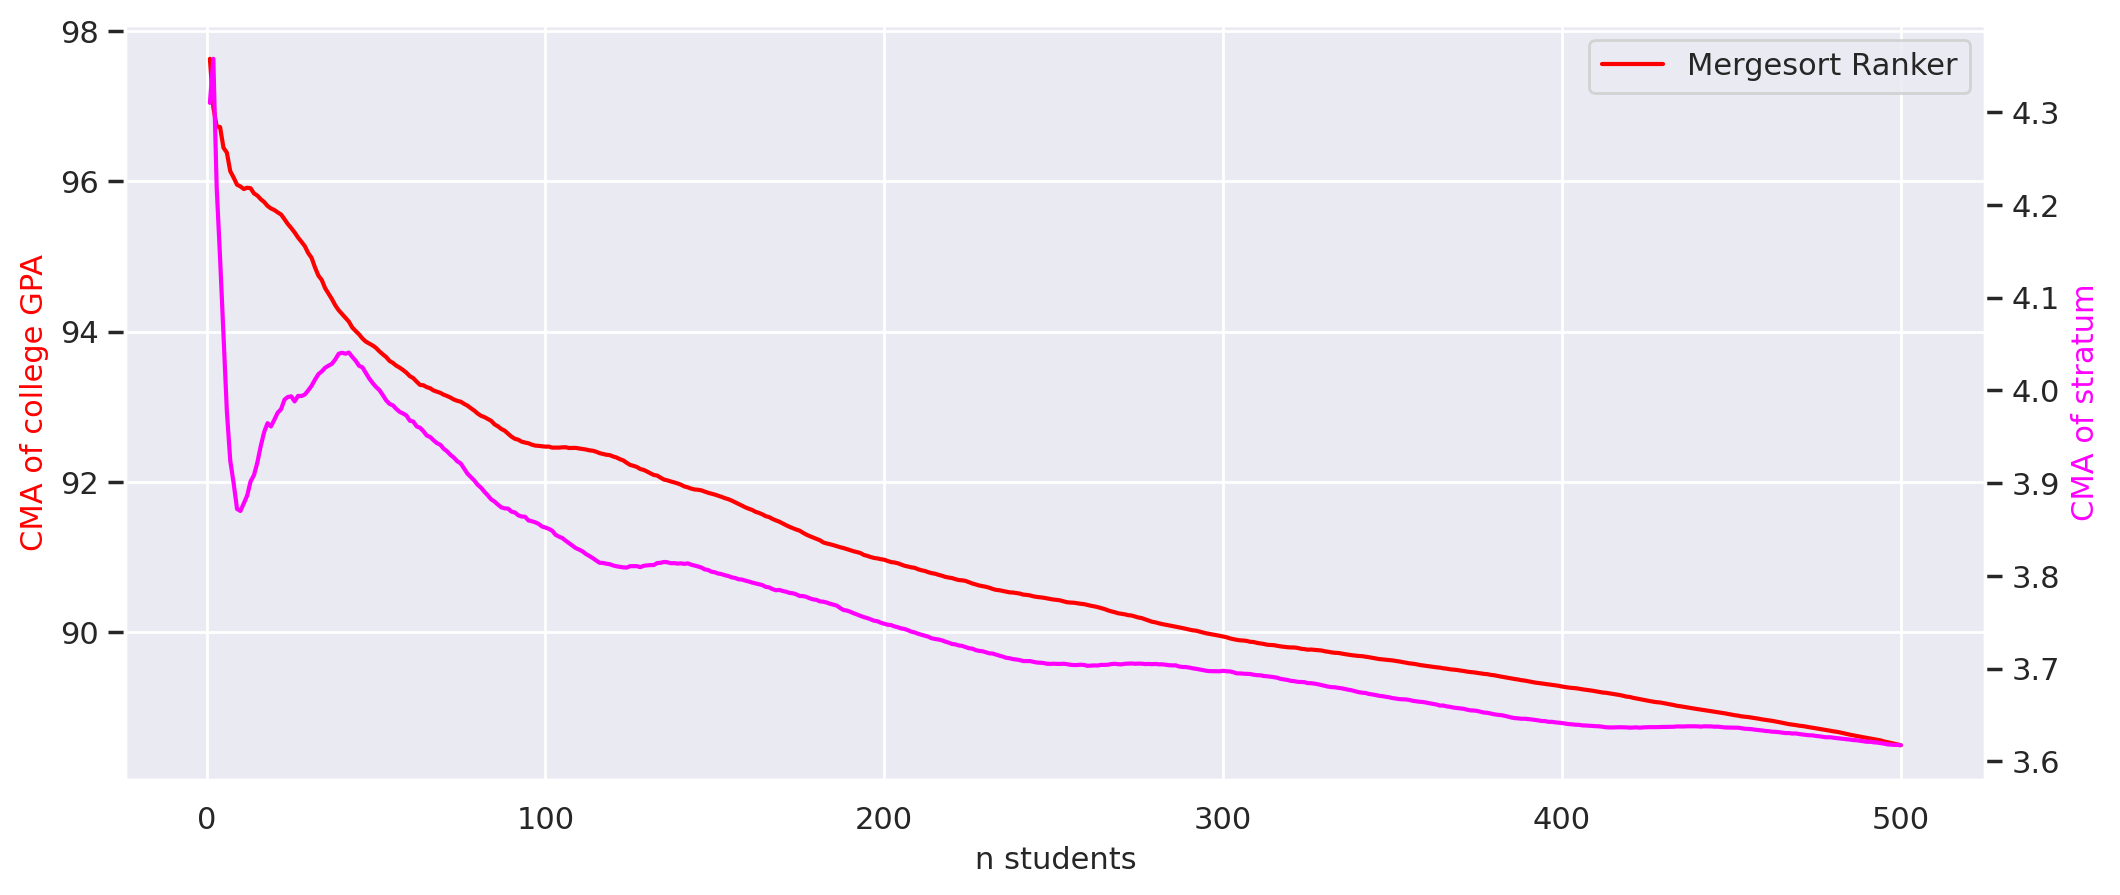

In [29]:
fig,ax = plt.subplots()
# make a plot

ax.plot(df_sort_BIG[:500].n_students, df_sort_BIG[:500].incr_col_mean, color="red")
# set x-axis label
ax.set_xlabel("n students",fontsize=11)
# set y-axis label
ax.set_ylabel("CMA of college GPA",color="red",fontsize=11)
plt.legend([ "Mergesort Ranker"], loc ="upper right")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_sort_BIG[:500].n_students, df_sort_BIG[:500]["incr_stratum"],color="magenta")
ax2.set_ylabel("CMA of stratum",color="magenta",fontsize=11)
ax2.grid(None)

#plot
plt.xlabel('n students')
plt.ylabel('CMA of stratum')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
# plt.legend([ "Mergesort Ranker"], loc ="upper right")
#plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")


plt.show()


## Gendersort Ranker 
Choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking).

Merge sort for Female df and Male df and append and sort

Adding confidence interval


In [30]:
# #Gendersort single
# def gender_mergesort_all(df):
#     df_temp = df.copy()
#     df_M = df_temp[df_temp.GENDER_bin == 0]
#     df_F = df_temp[df_temp.GENDER_bin == 1]
    
#     df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
#     df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

#     if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
#         sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
#     else: 
#         sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
#     return sorted_with_gender.reset_index()
        

# gender_df = gender_mergesort_all(df_for_Mergesort_single)


In [31]:
#Gendersort all

GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})

def gender_mergesort_BIG(df):
    

    dfs_test_use = df #= X_test_y_test_FULL.rename(columns={'3': 'HI_GRADE_AVG','4': 'Gender_bins', '18': 'COL_GRADE_AVG'})
    FEMALES = pd.DataFrame()
    MALES= pd.DataFrame()
    # GUDF_1['INDEXES'] = GUDF_1['Unnamed: 0'] 
 
    for i in range(200):
        # df_test_use[i]
        fem=dfs_test_use[i][dfs_test_use[i]['4'] != 0]
        mal = dfs_test_use[i][dfs_test_use[i]['4'] != 1]


        fem= fem.sort_values(by="3", ascending=False, kind="mergesort").reset_index()
        mal= mal.sort_values(by="3", ascending=False, kind="mergesort").reset_index()
        fem = fem.merge(GUDF_1[['Unnamed: 0','STRATUM']], on='Unnamed: 0')
        mal = mal.merge(GUDF_1[['Unnamed: 0','STRATUM']], on='Unnamed: 0')

        FEMALES= FEMALES.append(fem)
        MALES=MALES.append(mal)

    # return fem
   
    # return FEMALES

    FEMALES.index.names = ['INDEXES']
    MALES.index.names = ['INDEXES']

    # for startums
    
    # FEMALES = FEMALES.merge(GUDF_1[['INDEXES','STRATUM']], on='INDEXES')
    # MALES = MALES.merge(GUDF_1[['INDEXES','STRATUM']], on='INDEXES')
    
    # X_test_y_test_FULL = X_test_y_test_FULL.rename(columns={'3': 'HI_GRADE_AVG','4': 'Gender_bins', '18': 'COL_GRADE_AVG'})
    # X_test_y_test_FULL_F = X_test_y_test_FULL[X_test_y_test_FULL.Gender_bins != 0]
    # X_test_y_test_FULL_M = X_test_y_test_FULL[X_test_y_test_FULL.Gender_bins != 1]

    # X_test_y_test_FULL_females = X_test_y_test_FULL_F.groupby('INDEXES').mean()

    
    #add std to plot it later
    FEMALES_std = FEMALES.groupby('INDEXES').std()/np.sqrt(200)
    MALES_std = MALES.groupby('INDEXES').std()/np.sqrt(200)
     
    FEMALES = FEMALES.groupby('INDEXES').mean().merge(FEMALES_std["18"], on="INDEXES", how="left")
    MALES = MALES.groupby('INDEXES').mean().merge(MALES_std["18"], on="INDEXES", how="left")
        
    if FEMALES['3'].max() > MALES['3'].max():
        sorted_with_gender = pd.concat([FEMALES,MALES], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([MALES,FEMALES], sort=False).sort_index()
        
    
    return sorted_with_gender.reset_index()
  

gender_df_BIG = gender_mergesort_BIG(dfs_test_use)


In [32]:

de_første = np.arange(0,200)
gender_df_BIG_første = gender_df_BIG.loc[gender_df_BIG.index.isin(de_første)]
gender_df_BIG_første.STRATUM_y.value_counts(normalize=True)*100


3.630    2.5
3.515    2.0
3.505    2.0
3.725    2.0
3.620    1.5
        ... 
3.450    0.5
3.310    0.5
3.700    0.5
4.200    0.5
3.495    0.5
Name: STRATUM_y, Length: 121, dtype: float64

In [33]:
# gender_df_BIG_std =  gender_df_BIG.groupby('INDEXES').std()/np.sqrt(200)

gender_df_BIG["incr_col_mean"] = gender_df_BIG['18_x'].expanding().mean()
gender_df_BIG["incr_col_mean_std"] = gender_df_BIG['18_y'].expanding().mean()
gender_df_BIG["incr_stratum"] = gender_df_BIG['STRATUM_y'].expanding().mean()

gender_df_BIG["n_students"] = range(1,len(gender_df_BIG)+1)

In [34]:
#Adding standard deviation column for "incr_col_mean" and variables for plotting 200
gender_df_BIG["incr_half_std"] = 0.5*gender_df_BIG["incr_col_mean_std"] #0.5 of std to plot on both sides of mean
gender_df_BIG["lower_std"] = gender_df_BIG["incr_col_mean"] - gender_df_BIG["incr_half_std"]
gender_df_BIG["upper_std"] = gender_df_BIG["incr_col_mean"] + gender_df_BIG["incr_half_std"]

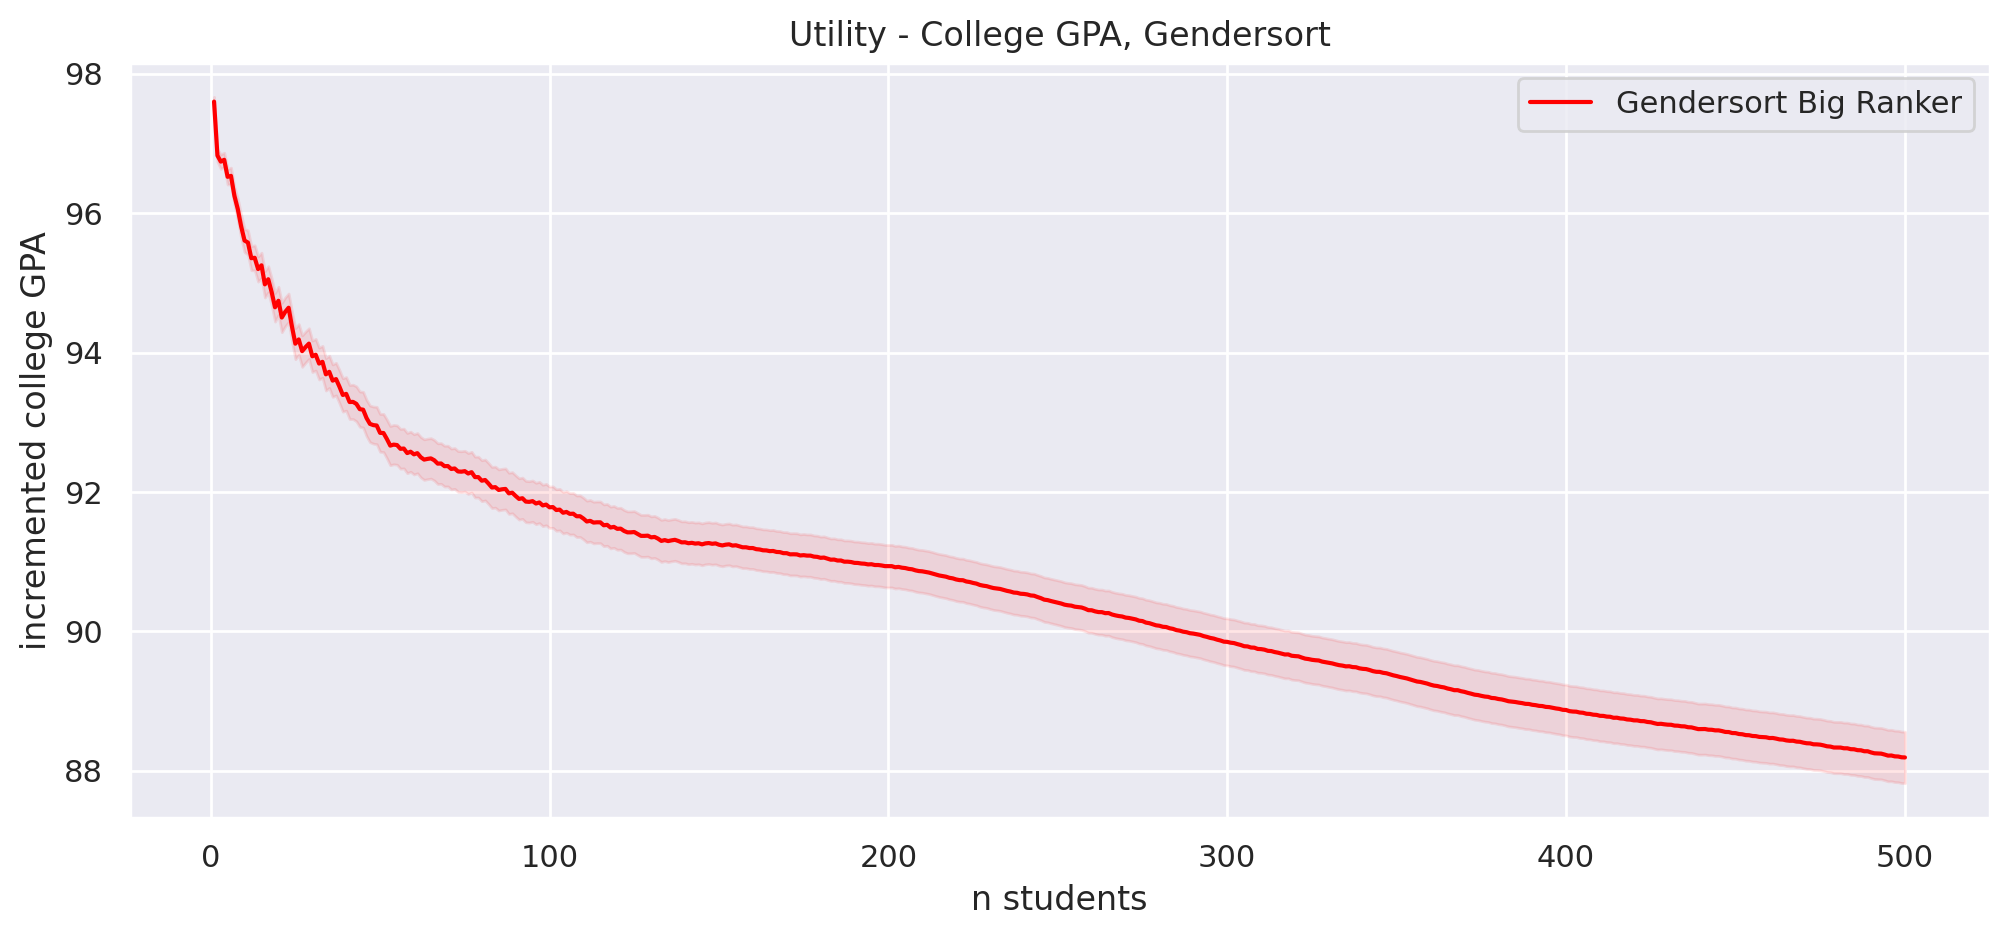

In [35]:

# The gendersort as function of n
#set the incremented col avg as column
import matplotlib
import matplotlib.pyplot as plt

# gender_df["incr_col_mean"] = gender_df['COL_GRADE_AVG'].rolling(15).mean()#.expanding().mean()
# gender_df["incr_col_mean"][:16] = gender_df['COL_GRADE_AVG'][:16]
# gender_df["n_students"] = range(1,len(gender_df)+1)
# Look of single lineplot of gendersort grades as function of n
# sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color="orange").set_title("Utility - College GPA, Gendersort")
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df_BIG[:500], color="red").set_title("Utility - College GPA, Gendersort")
#std 200 dfs:
plt.fill_between("n_students", "lower_std", "upper_std",data=gender_df_BIG[0:500], alpha=0.1, color="red")



plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.savefig('Gendersort_solo_200.png')
plt.legend(["Gendersort Big Ranker"], loc ="upper right")

plt.show()

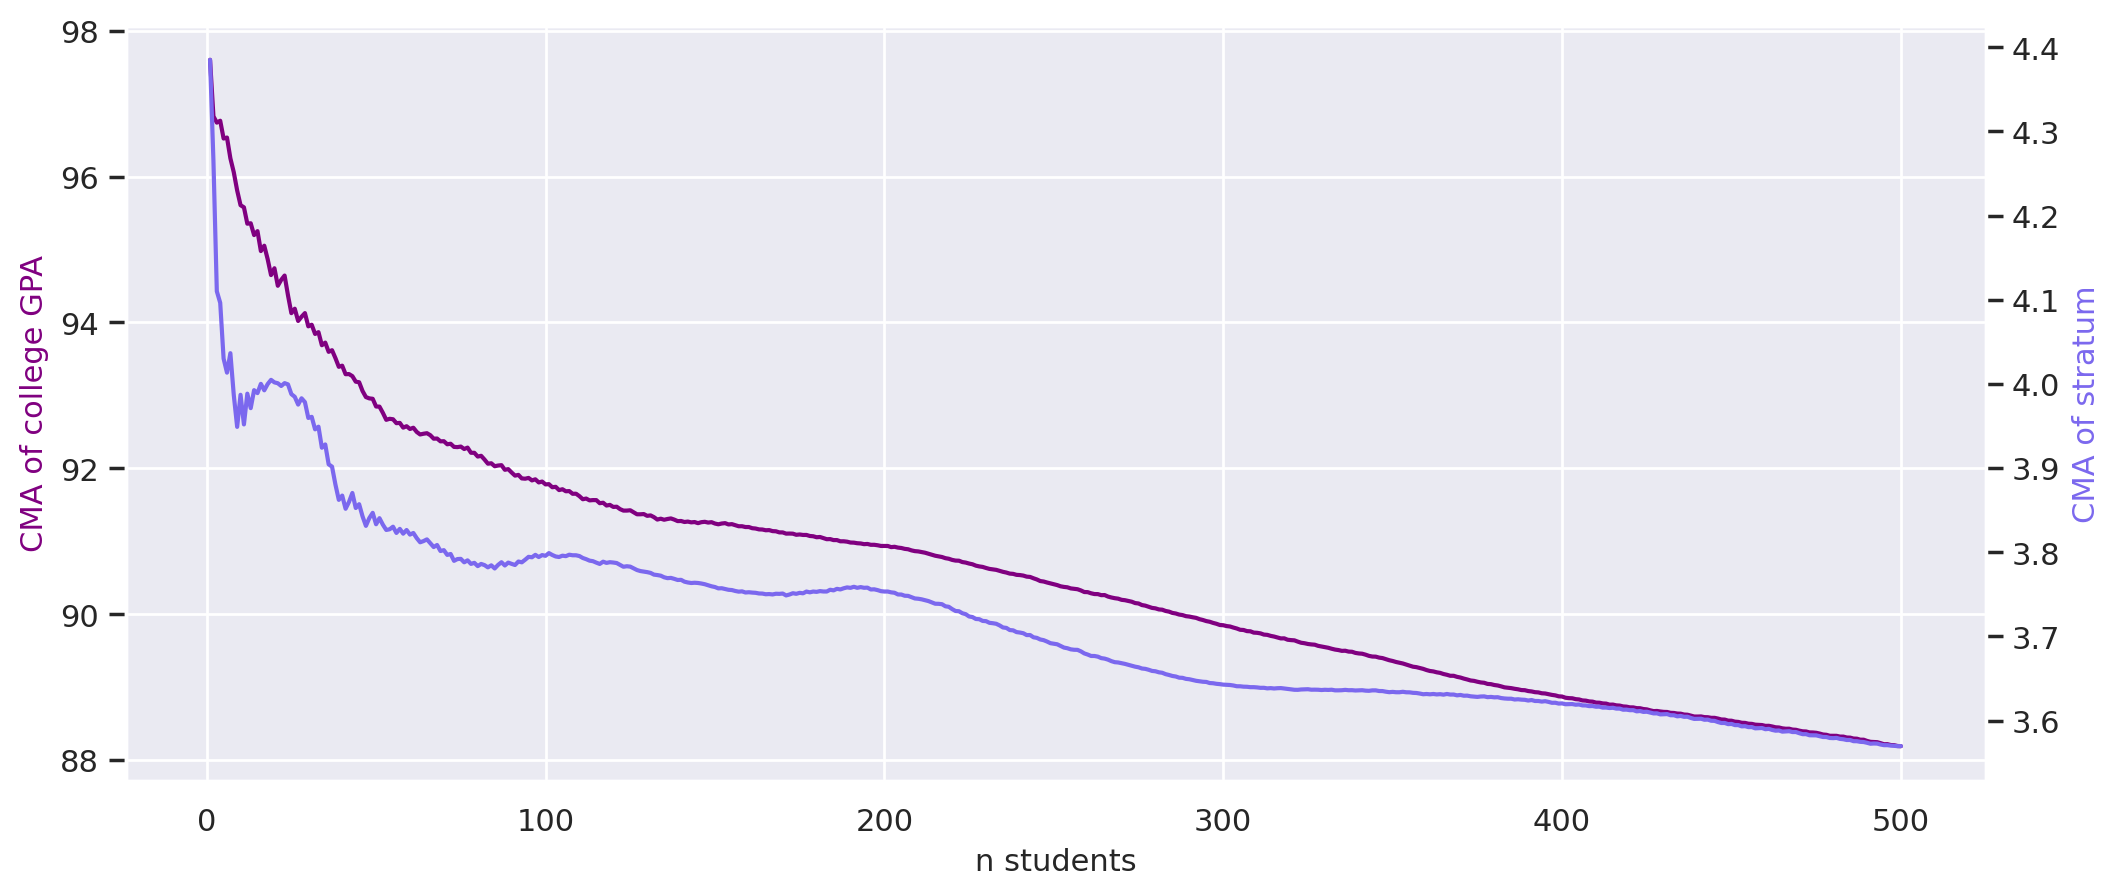

In [36]:
fig,ax = plt.subplots()
# make a plot

ax.plot(gender_df_BIG[:500].n_students, gender_df_BIG[:500].incr_col_mean, color="purple")
# set x-axis label
ax.set_xlabel("n students",fontsize=11)
# set y-axis label
ax.set_ylabel("CMA of college GPA",color="purple",fontsize=11)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gender_df_BIG[:500].n_students, gender_df_BIG[:500]["incr_stratum"],color="mediumslateblue")
ax2.set_ylabel("CMA of stratum",color="mediumslateblue",fontsize=11)
ax2.grid(None)
plt.show()

Forklaringen på, at Plain har lavere utility end without er, at without ikke trækker ned i karakter for kvinder. Without gør muligvis det, at den ikke udnervurderer i toppen. 


### Random sort utility
2000 samples of random dataframes are generated and plotted with std. as error bars


In [37]:
GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})
X_test_y_test_FULL=X_test_y_test_FULL.merge(GUDF_1[['Unnamed: 0','STRATUM','GENDER']], how='left',on='Unnamed: 0',sort=False)

X_test_y_test_FULL

,index,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,index_real,STRATUM_x,GENDER_x,STRATUM_y,GENDER_y
0,1784,11864,81,100,93,97.666667,1,0,0,0,0,0,1,0,1,0,0,0,1,0,98.666667,0,5,F,5,F
1,3721,4874,97,100,90,96.666667,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.333333,1,3,M,3,M
2,1989,1089,100,100,90,95.000000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,97.000000,2,3,M,3,M
3,3830,4900,81,95,91,93.666667,0,0,0,1,0,0,0,0,0,0,0,1,0,1,96.333333,3,2,M,2,M
4,2332,2607,89,89,96,93.333333,0,0,0,0,1,0,0,0,1,0,0,0,1,0,98.000000,4,3,M,3,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819195,818923,1195,47,32,35,37.333333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,45.000000,4091,2,M,2,M
819196,818192,9686,63,36,35,36.333333,1,0,1,0,0,0,0,0,0,0,0,1,0,1,20.000000,4092,1,F,1,F
819197,818709,1909,47,36,42,36.333333,0,0,1,0,0,0,0,0,1,0,0,0,1,0,7.000000,4093,1,M,1,M
819198,817295,3588,53,24,35,33.666667,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17.000000,4094,1,M,1,M


In [38]:
# # #Random generated dfs
# pd.options.mode.chained_assignment = None 

# df_use = df_for_Mergesort_single.copy()
# df_use = df_use[["Unnamed: 0","COL_GRADE_AVG", "GENDER_bin","STRATUM"]] 
# replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
# df_use = df_use.replace({'STRATUM':replaceing})

# for j in range(1,2): #first make one random df that we can append the other random dfs to
#     gen_state = random.seed(a=None) #random generator
#     df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
#     df_random1["incr_col_mean"] = df_random1.COL_GRADE_AVG.expanding().mean()
#     df_random1["n_students"] = range(1,len(df_random1)+1)
#     for i in range(1000):
#         gen_state = random.seed(a=None)
#         df_random2 = shuffle(df_use, random_state=gen_state)
#         df_random2["incr_col_mean"] = df_random2.COL_GRADE_AVG.expanding().mean()
#         df_random2["n_students"] = range(1,len(df_random2)+1)
#         df_random1 = df_random1.append(df_random2)
# #The random df to use

In [39]:
# # #only take n students from index 1-500
# indexs = np.arange(0,500)
# df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
# df_random_use = df_random_use.reset_index()
# #First we plot the random grades per n students
# # # w 2000 samples
# # #indexs = np.arange(0,500)
# # #df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
# #sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")
# #plt.xlabel('n students')
# #plt.ylabel('incremented college GPA')
# #plt.title("Utility - College GPA, Random") 
# #plt.show()



In [40]:
# de_første = np.arange(0,200)
# df_random_use_første = df_random_use.loc[df_random_use.index.isin(de_første)]
# df_random_use_første.STRATUM.value_counts(normalize=True)*100


## Plain XGBoost 

Using "preds" as College scores for XGBoost

Det skal tjekkes her, hvilken af de 3 grafer, der faktisk er den rigtige. 

In [41]:
# GUDF = pd.read_csv('GUDF.csv')
y_test_TWO = pd.read_csv('TWO_samlet_preds_index_NY_PLAIN.csv')


GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})



import numpy as np
Splitte_PLAIN = np.array_split(y_test_TWO, 200)
GUDF_1['Idx'] = GUDF_1['Unnamed: 0'] 

# MERGESORT HERUNDER PÅ BIG 
Merged_PLAIN = pd.DataFrame()
for i in range(200):
    Splitte_PLAIN[i]= Splitte_PLAIN[i].sort_values(by="Preds", ascending=False, kind="mergesort")
    Splitte_PLAIN[i] = Splitte_PLAIN[i].merge(GUDF_1[['Idx','COL_GRADE_AVG','STRATUM']], on='Idx')
    Splitte_PLAIN[i]= Splitte_PLAIN[i].reset_index()
    Merged_PLAIN = Merged_PLAIN.append(Splitte_PLAIN[i])



In [42]:
# How many of each stratum is there 
de_første = np.arange(0,200)
Merged_PLAIN_første = Merged_PLAIN.loc[Merged_PLAIN['Unnamed: 0'].isin(de_første)]
Merged_PLAIN_første.STRATUM.value_counts(normalize=True)*100

3    29.7825
4    27.1050
5    15.5125
2    13.7975
6    11.7975
1     2.0050
Name: STRATUM, dtype: float64

In [43]:

Merged_PLAIN_use_std = Merged_PLAIN.copy()
Merged_PLAIN =  Merged_PLAIN.groupby('index').mean()
Merged_PLAIN_std =  Merged_PLAIN_use_std.groupby('index').std()/np.sqrt(200)


Merged_PLAIN["incr_col_mean"] = Merged_PLAIN['COL_GRADE_AVG'].expanding().mean()
Merged_PLAIN_std["incr_col_mean"] = Merged_PLAIN_std['COL_GRADE_AVG'].expanding().mean()
Merged_PLAIN["incr_stratum"] = Merged_PLAIN['STRATUM'].expanding().mean()

Merged_PLAIN["n_students"] = range(1,len(Merged_PLAIN)+1)



#Adding standard deviation column for "incr_col_mean" and variables for plotting 200
Merged_PLAIN["incr_half_std"] = 0.5*Merged_PLAIN_std["incr_col_mean"] #0.5 of std to plot on both sides of mean
Merged_PLAIN["lower_std"] = Merged_PLAIN["incr_col_mean"] - Merged_PLAIN["incr_half_std"]
Merged_PLAIN["upper_std"] = Merged_PLAIN["incr_col_mean"] + Merged_PLAIN["incr_half_std"]


# Kat_PLAIN_utility = sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
# plt.fill_between("n_students", "lower_std", "upper_std",data=df_plain_TWO_mean[0:500], alpha=0.1, color="cornflowerblue")


# Kat_PLAIN_utility = sns.lineplot(data=Merged_PLAIN[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")
# plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[:500], alpha=0.1, color="green")


# Kat_PLAIN_utility = sns.lineplot(data=Merged_PLAIN[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")
# plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[:500], alpha=0.1, color="green")

# Kat_PLAIN_utility_w_o_CMA = sns.lineplot(data=Merged_PLAIN_w_o_CMA[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")
# plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[:500], alpha=0.1, color="green")


# plt.xlabel('n students')
# plt.ylabel('incremented college GPA')
# # plt.title("Averge grade as a function of n student, baselines and XGBoost")
# plt.title('Utility of Plain XGBoost - College GPA, predictions and actual grades')
# plt.legend(["Plain XGBoost predictions", 'Plain XGBoost actual college GPAs'], loc ="upper right")
# plt.show()

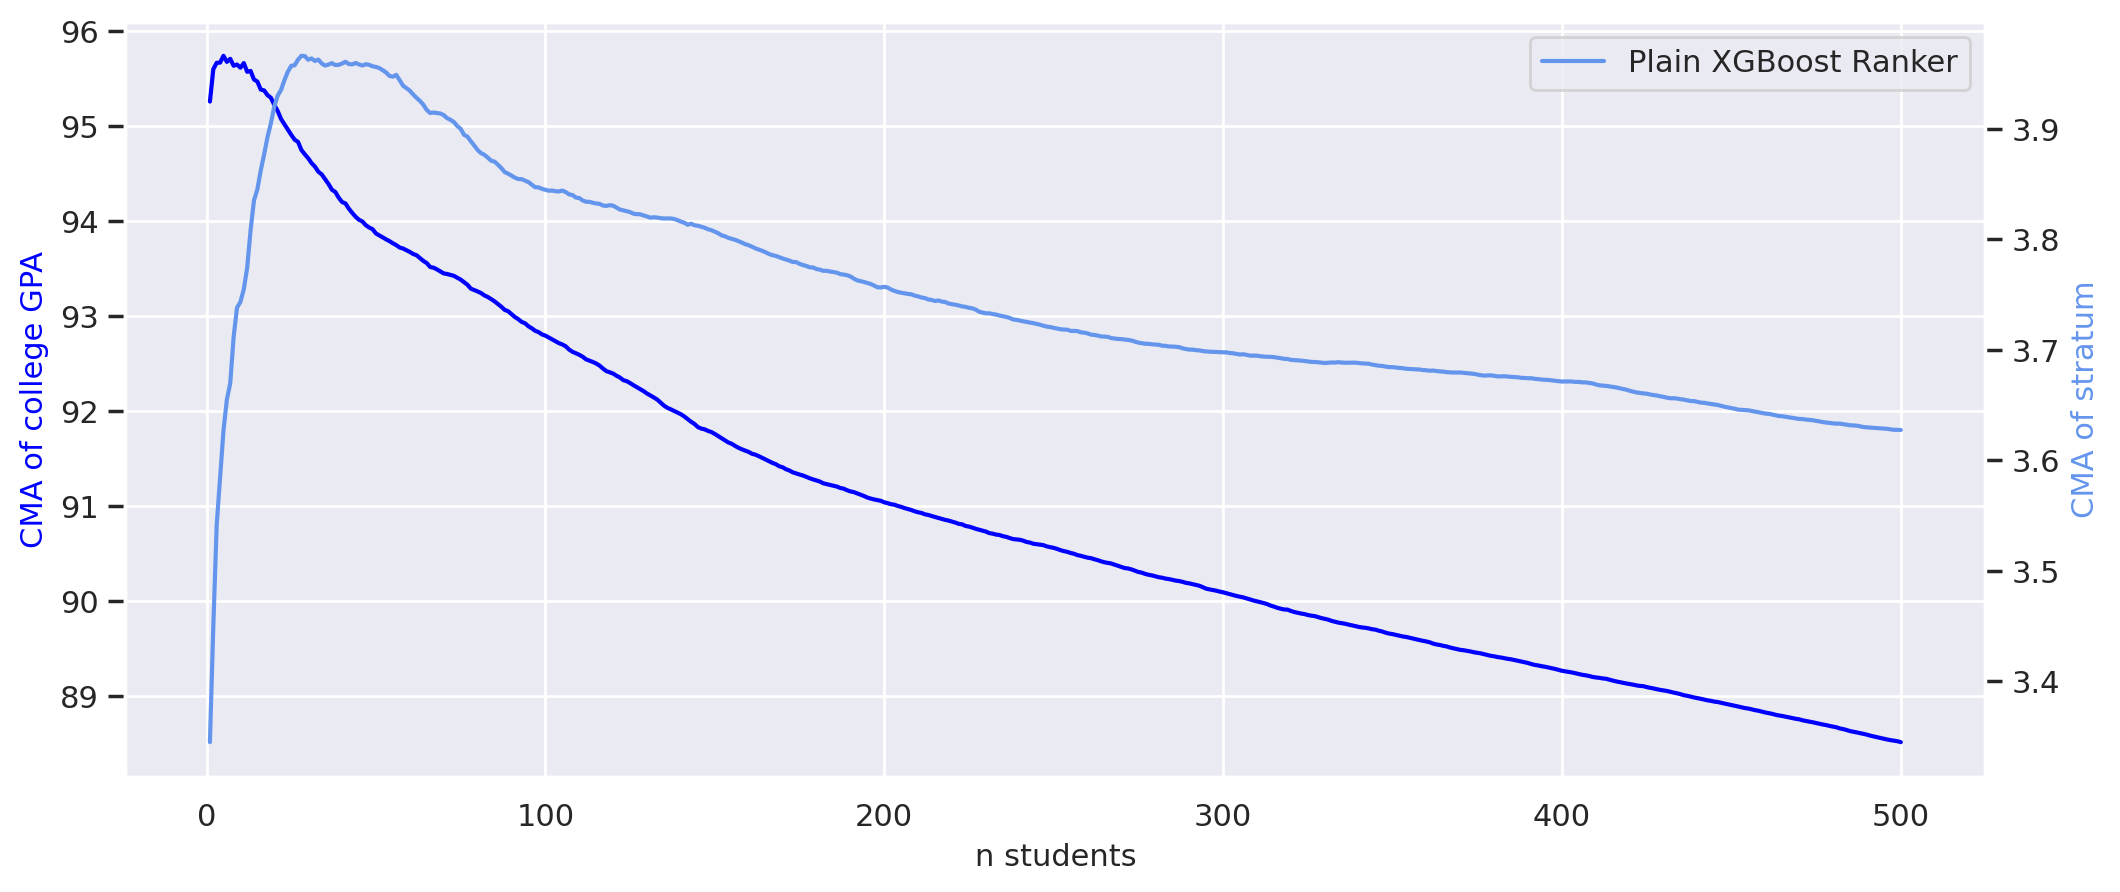

In [44]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot

ax.plot(Merged_PLAIN[:500].n_students, Merged_PLAIN[:500].incr_col_mean, color="blue")
# set x-axis label
ax.set_xlabel("n students",fontsize=11)
# set y-axis label
ax.set_ylabel("CMA of college GPA",color="blue",fontsize=11)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merged_PLAIN[:500].n_students, Merged_PLAIN[:500]["incr_stratum"],color="cornflowerblue")
ax2.set_ylabel("CMA of stratum",color="cornflowerblue",fontsize=11)
ax2.grid(None)

#plot
plt.xlabel('n students')
plt.ylabel('CMA of stratum')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
plt.legend([ "Plain XGBoost Ranker"], loc ="upper right")
#plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")


plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

## Without sensitive attributes XGBoost

In [45]:
# WO XGBoost

GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})#,'Stratum_3',3, inplace=True)



y_test_TWO_WO = pd.read_csv('TWO_samlet_preds_index_ny_WO.csv')

import numpy as np
Splitte_WO = np.array_split(y_test_TWO_WO, 200)
GUDF_1['Idx'] = GUDF_1['Unnamed: 0'] 

# MERGESORT HERUNDER PÅ BIG 
Merged_WO = pd.DataFrame()
for i in range(200):
    Splitte_WO[i]= Splitte_WO[i].sort_values(by="Preds", ascending=False, kind="mergesort")
    Splitte_WO[i] = Splitte_WO[i].merge(GUDF_1[['Idx','COL_GRADE_AVG', 'STRATUM']], on='Idx')
    Splitte_WO[i]= Splitte_WO[i].reset_index()
    Merged_WO = Merged_WO.append(Splitte_WO[i])

In [46]:
# How many of each stratum is there 
de_første = np.arange(0,200)
Merged_WO_første = Merged_WO.loc[Merged_WO['Unnamed: 0'].isin(de_første)]
Merged_WO_første.STRATUM.value_counts(normalize=True)*100

3    29.9575
4    24.4300
5    15.2450
2    14.2975
6    13.2450
1     2.8250
Name: STRATUM, dtype: float64

In [47]:

Merged_WO_use_std = Merged_WO.copy()
Merged_WO =  Merged_WO.groupby('index').mean()
Merged_WO_std =  Merged_WO_use_std.groupby('index').std()/np.sqrt(200)

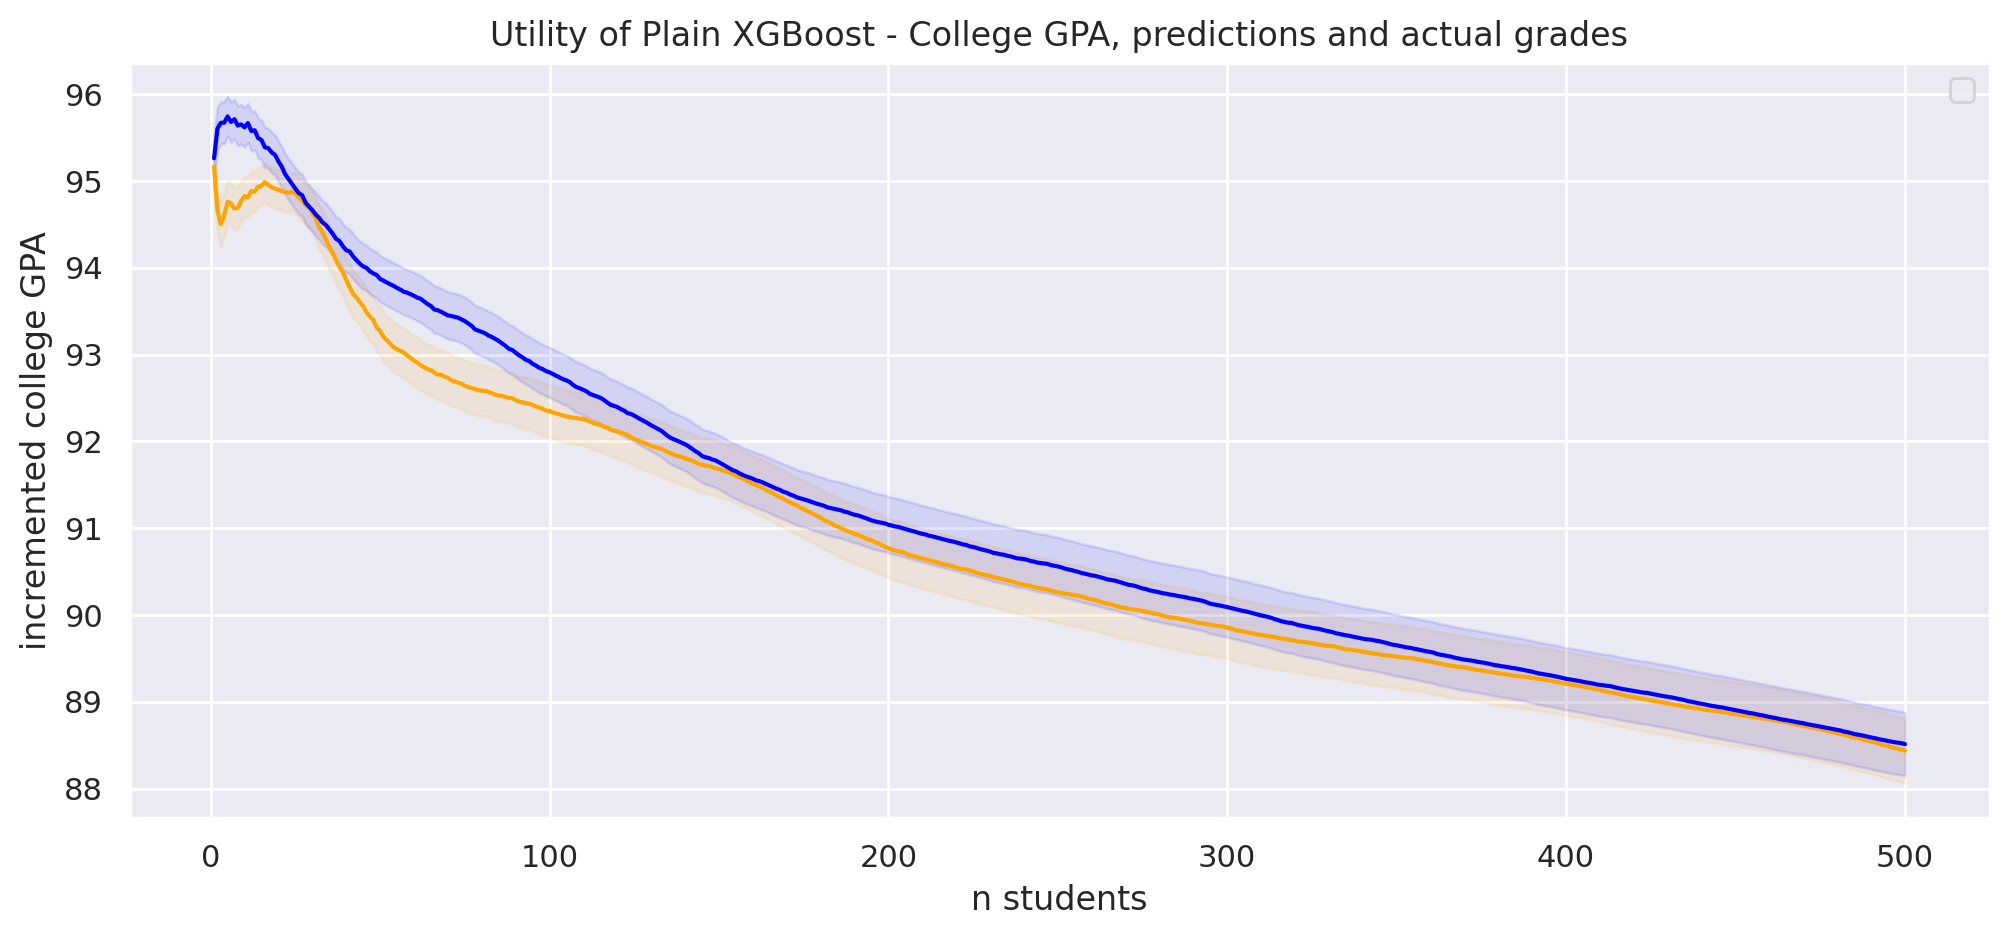

In [48]:
# add exp. mean
# Merged_WO = Merged_WO.sort_values('Preds',ascending=False)
Merged_WO["incr_col_mean"] = Merged_WO['COL_GRADE_AVG'].expanding().mean()
Merged_WO["incr_stratum"] = Merged_WO['STRATUM'].expanding().mean()
Merged_WO_std["incr_col_mean"] = Merged_WO_std['COL_GRADE_AVG'].expanding().mean()

Merged_WO["n_students"] = range(1,len(Merged_WO)+1)



#add exp. std
Merged_WO["incr_half_std"] = 0.5*Merged_WO_std["incr_col_mean"] #0.5 of std to plot on both sides of mean
Merged_WO["lower_std"] = Merged_WO["incr_col_mean"] - Merged_WO["incr_half_std"]
Merged_WO["upper_std"] = Merged_WO["incr_col_mean"] + Merged_WO["incr_half_std"]



#plot Plain and WO
plt.xlabel('n students')
plt.ylabel('incremented college GPA')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.title('Utility of Plain XGBoost - College GPA, predictions and actual grades')
plt.legend(["Plain XGBoost predictions", 'Plain XGBoost actual college GPAs'], loc ="upper right")


sns.lineplot(data=Merged_WO[:500], x="n_students", y="incr_col_mean",  color="orange")
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_WO[:500], alpha=0.1, color="orange")

sns.lineplot(data=Merged_PLAIN[:500], x="n_students", y="incr_col_mean",  color="blue")
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[:500], alpha=0.1, color="blue")



plt.show()

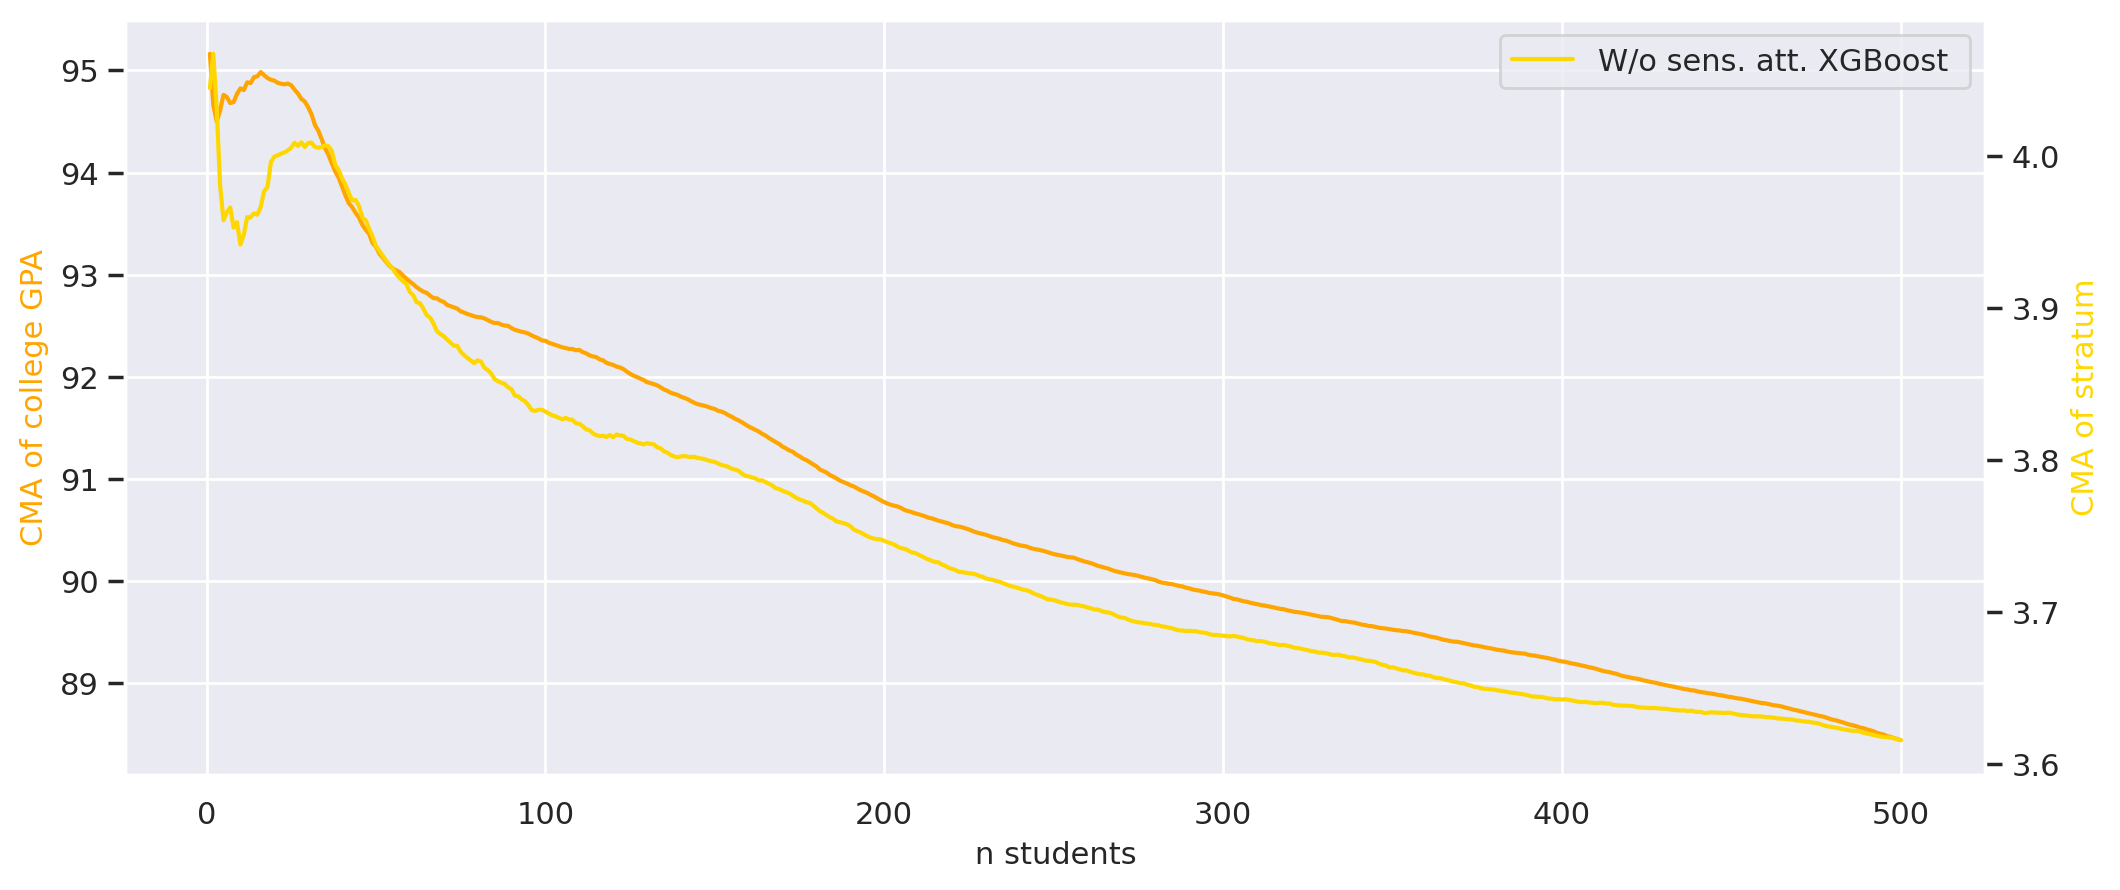

In [49]:
# create figure and axis objects with subplots()

# def setup_mpl():
#     mpl.rcParams["font.family"] = "Helvetica Neue"
#     mpl.rcParams["font.size"] = 11
#     mpl.rcParams["figure.figsize"] = (12,5)
#     mpl.rcParams["figure.dpi"] = 300
#     # mpl.rcParams["lines.linewidth"] = 1
# setup_mpl()



fig,ax = plt.subplots()
# make a plot

ax.plot(Merged_WO[:500].n_students, Merged_WO[:500].incr_col_mean, color="orange")
# set x-axis label
ax.set_xlabel("n students",fontsize=11)
# set y-axis label
ax.set_ylabel("CMA of college GPA",color="orange",fontsize=11)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merged_WO[:500].n_students, Merged_WO[:500]["incr_stratum"],color="gold")
ax2.set_ylabel("CMA of stratum",color="gold",fontsize=11)
ax2.grid(None)


#plot
plt.xlabel('n students')
plt.ylabel('CMA of stratum')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
plt.legend([ "W/o sens. att. XGBoost "], loc ="upper right")
#plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")


plt.show()


Forklaringen på, at Plain har lavere utility end without er, at without ikke trækker ned i karakter for kvinder. Without gør muligvis det, at den ikke udnervurderer i toppen. 

# Fairness enhanced Ranker on 200 re-rankings

In [50]:
df_fair_TWO = pd.read_csv('re_ranked_199_NY_50.csv') # denne er på 5 procent


GUDF = pd.read_csv('GUDF.csv')
GUDF_1 = GUDF.copy()
replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})

import numpy as np
Splitte_FAIR = np.array_split(df_fair_TWO, 200)
GUDF_1['Idx'] = GUDF_1['Unnamed: 0'] 

# MERGESORT HERUNDER PÅ BIG 
Merged_FAIR = pd.DataFrame()
for i in range(200):
    Splitte_FAIR[i]= Splitte_FAIR[i].sort_values(by="Preds", ascending=False, kind="mergesort")
    Splitte_FAIR[i] = Splitte_FAIR[i].merge(GUDF_1[['Idx','COL_GRADE_AVG','STRATUM']], on='Idx')
    Splitte_FAIR[i]= Splitte_FAIR[i].reset_index()
    Merged_FAIR = Merged_FAIR.append(Splitte_FAIR[i])


In [51]:
# How many of each stratum is there 
de_første = np.arange(0,200)
Merged_FAIR_første = Merged_FAIR.loc[Merged_FAIR['Unnamed: 0'].isin(de_første)]
Merged_FAIR_første.STRATUM.value_counts(normalize=True)*100

3    30.0300
4    27.3600
5    15.4425
2    13.5400
6    11.5625
1     2.0650
Name: STRATUM, dtype: float64

<AxesSubplot:title={'center':'Utility of Plain XGBoost - College GPA, predictions and actual grades'}, xlabel='n students', ylabel='incremented college GPA'>

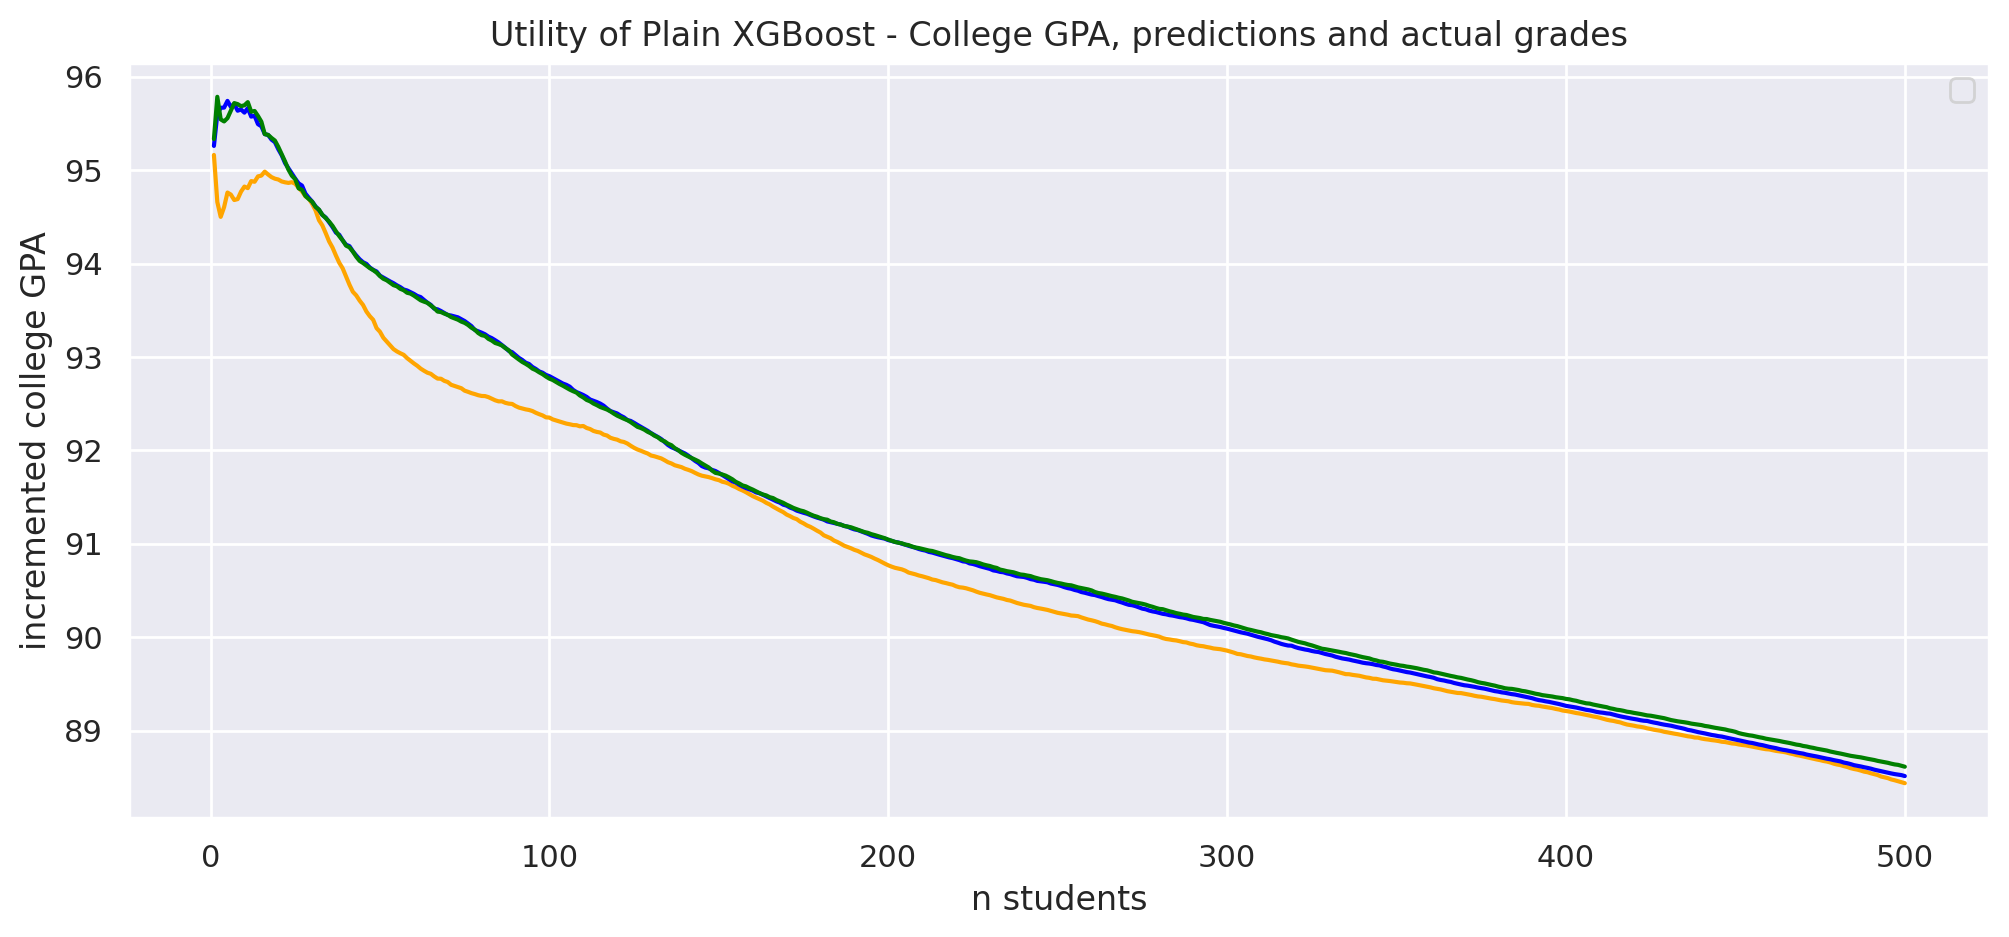

In [52]:

Merged_FAIR_use_std = Merged_FAIR.copy()
Merged_FAIR =  Merged_FAIR.groupby('index').mean()
Merged_FAIR_std =  Merged_FAIR_use_std.groupby('index').std()/np.sqrt(200)


#add exp. mean
# Merged_FAIR = Merged_FAIR.sort_values('Preds',ascending=False)
Merged_FAIR["incr_col_mean"] = Merged_FAIR['COL_GRADE_AVG'].expanding().mean()
Merged_FAIR_std["incr_col_error"] = Merged_FAIR_std['COL_GRADE_AVG'].expanding().mean()
Merged_FAIR["incr_stratum"] = Merged_FAIR['STRATUM'].expanding().mean()

Merged_FAIR["n_students"] = range(1,len(Merged_FAIR)+1)


#add exp. std
Merged_FAIR["incr_half_std"] = 0.5*Merged_FAIR_std["incr_col_error"] #0.5 of std to plot on both sides of mean
Merged_FAIR["lower_std"] = Merged_FAIR["incr_col_mean"] - Merged_FAIR["incr_half_std"]
Merged_FAIR["upper_std"] = Merged_FAIR["incr_col_mean"] + Merged_FAIR["incr_half_std"]



plt.xlabel('n students')
plt.ylabel('incremented college GPA')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.title('Utility of Plain XGBoost - College GPA, predictions and actual grades')
plt.legend(["Plain XGBoost predictions", 'Plain XGBoost actual college GPAs'], loc ="upper right")



sns.lineplot(data=Merged_WO[:500], x="n_students", y="incr_col_mean",  color="orange" , ci="sd")
sns.lineplot(data=Merged_PLAIN[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
sns.lineplot(data=Merged_FAIR[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")



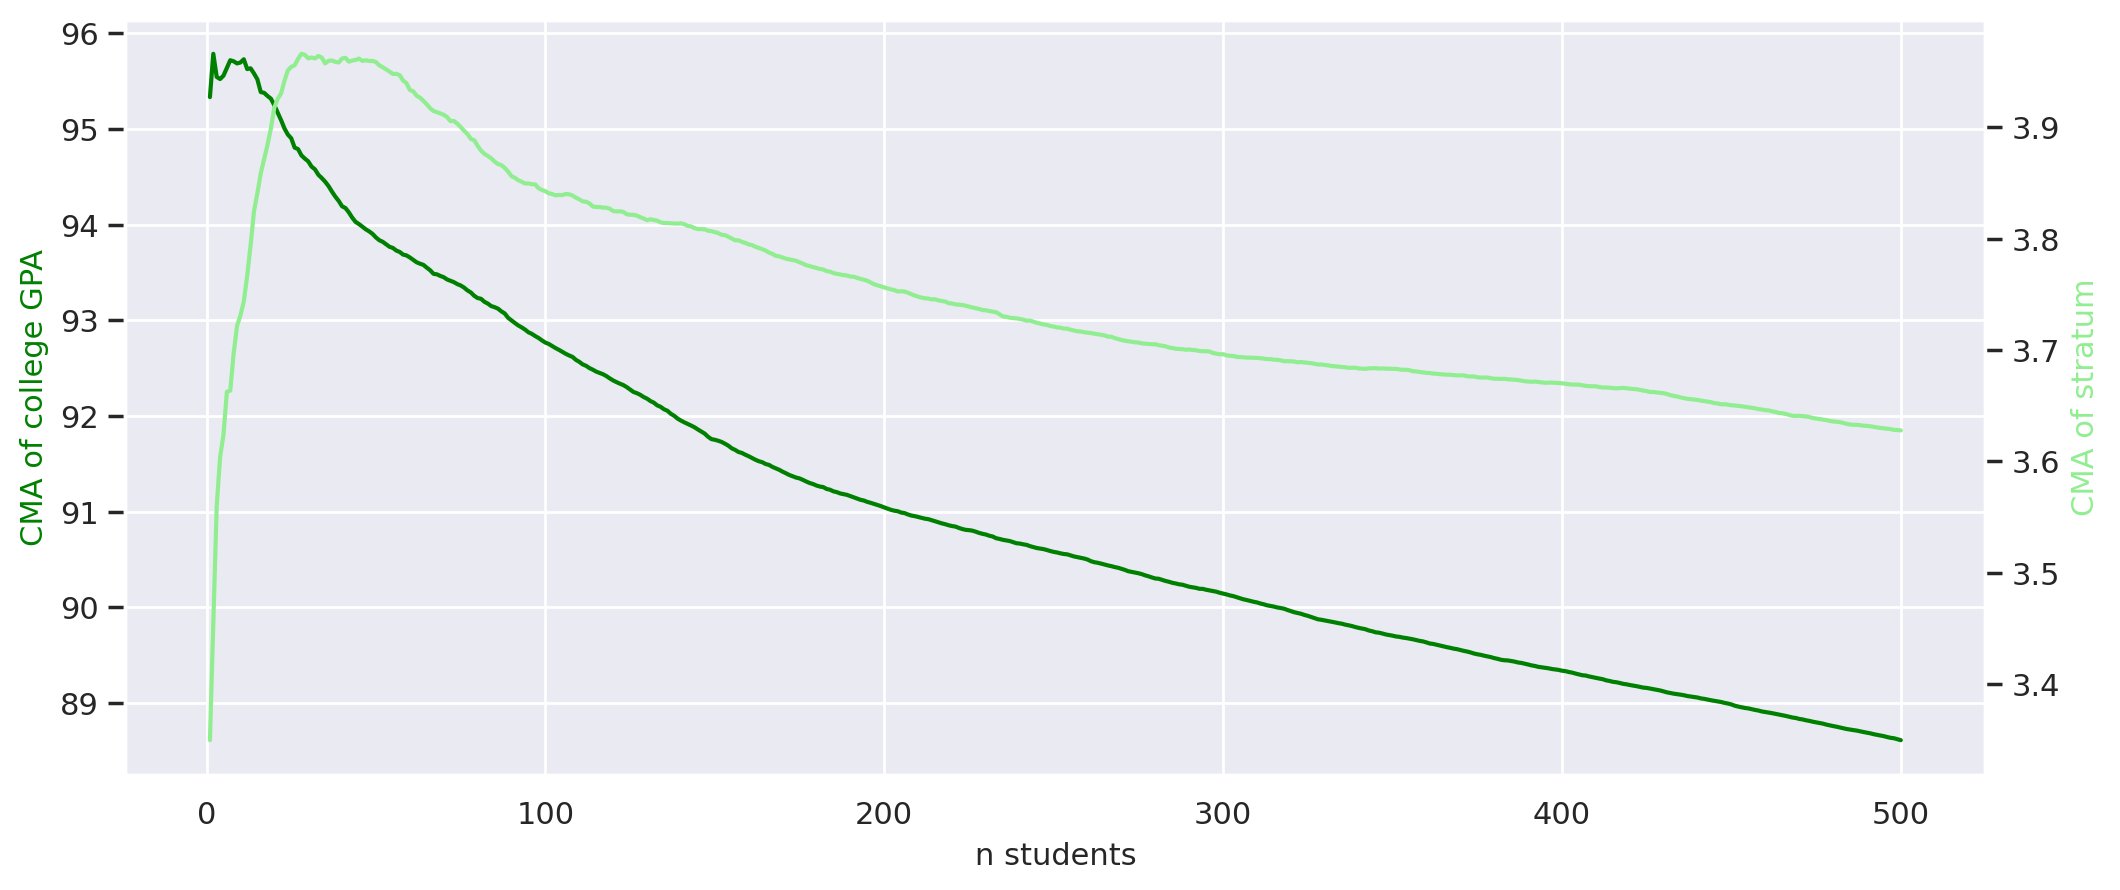

In [53]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot

ax.plot(Merged_FAIR[:500].n_students, Merged_FAIR[:500].incr_col_mean, color="green")
# set x-axis label
ax.set_xlabel("n students",fontsize=11)
# set y-axis label
ax.set_ylabel("CMA of college GPA",color="green",fontsize=11)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merged_FAIR[:500].n_students, Merged_FAIR[:500]["incr_stratum"],color="lightgreen")
ax2.set_ylabel("CMA of stratum",color="lightgreen",fontsize=11)
ax2.grid(None)

plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

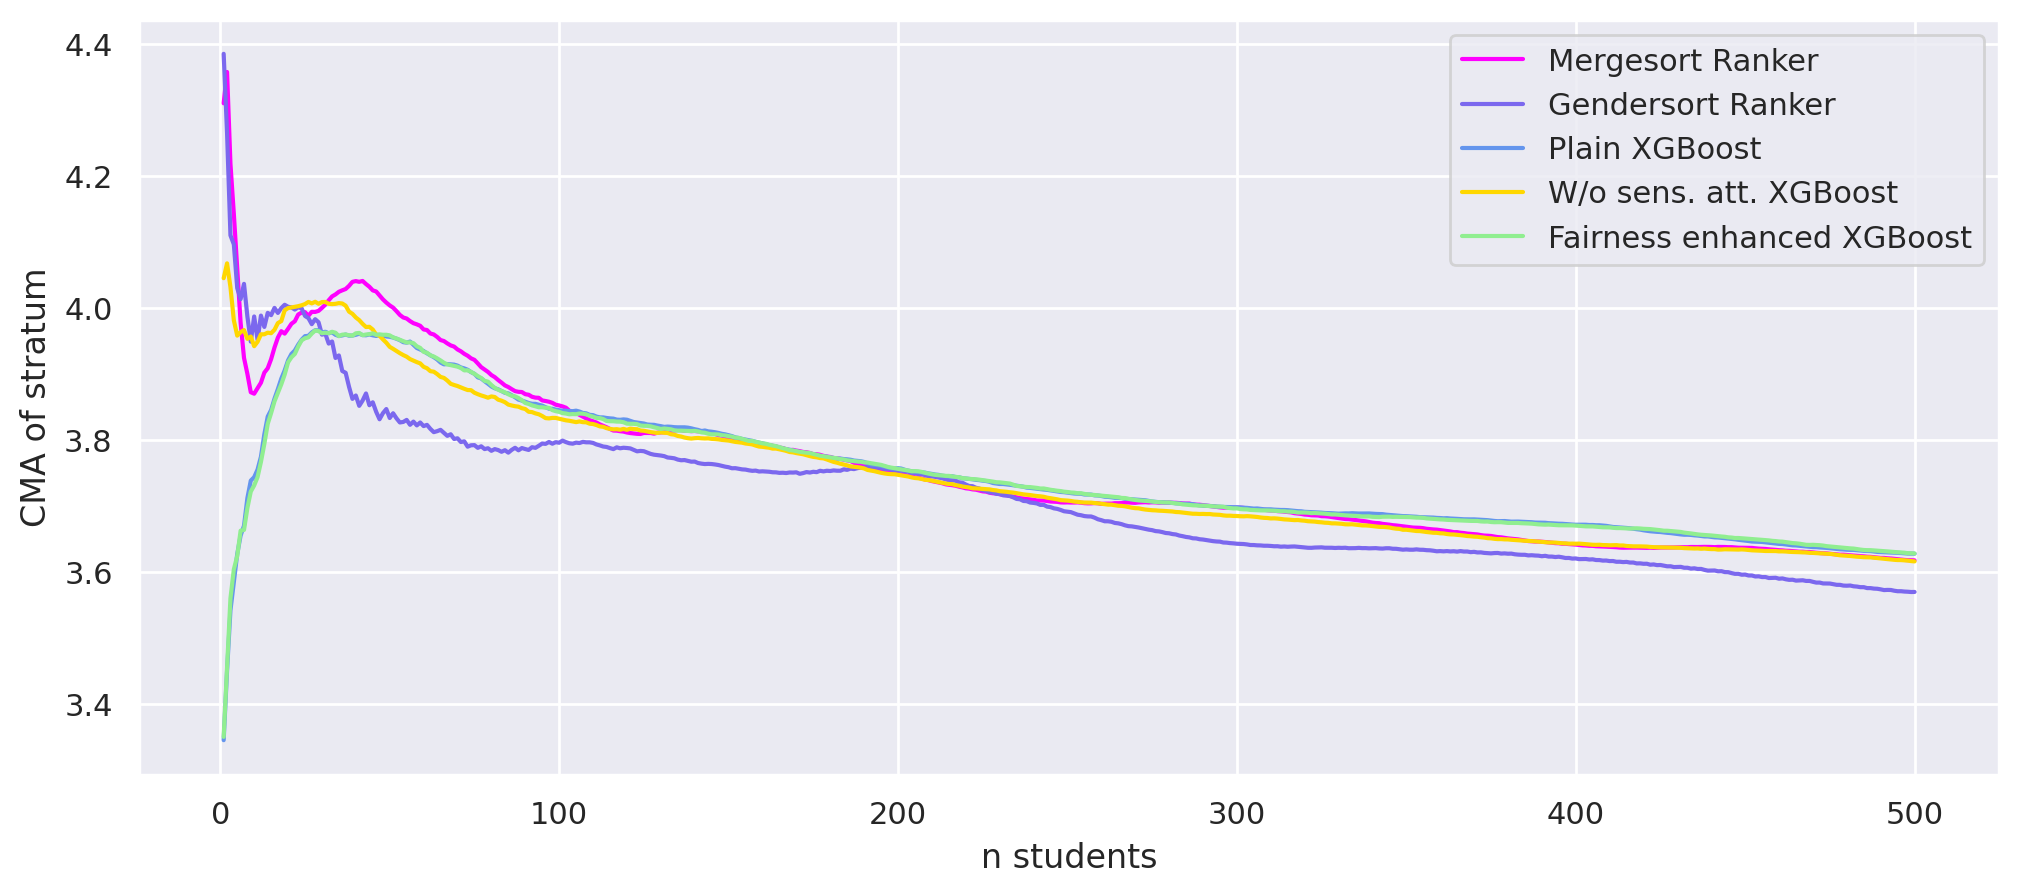

In [54]:
# All STRATUMS

sns.lineplot(x='n_students', y="incr_stratum", data=df_sort_BIG[0:500],color="magenta")
sns.lineplot(x='n_students', y="incr_stratum", data=gender_df_BIG[0:500],color="mediumslateblue")

sns.lineplot(x="n_students", y="incr_stratum", data=Merged_PLAIN[0:500], color="cornflowerblue")
sns.lineplot(x="n_students", y="incr_stratum", data=Merged_WO[0:500], color="gold")
sns.lineplot(x="n_students", y="incr_stratum", data=Merged_FAIR[0:500], color="lightgreen")




#plot
plt.xlabel('n students')
plt.ylabel('CMA of stratum')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
plt.legend([ "Mergesort Ranker","Gendersort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")
#plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")

plt.show()


# All utilities (with CI)

In [55]:

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,7)
    mpl.rcParams["figure.dpi"] = 300
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()




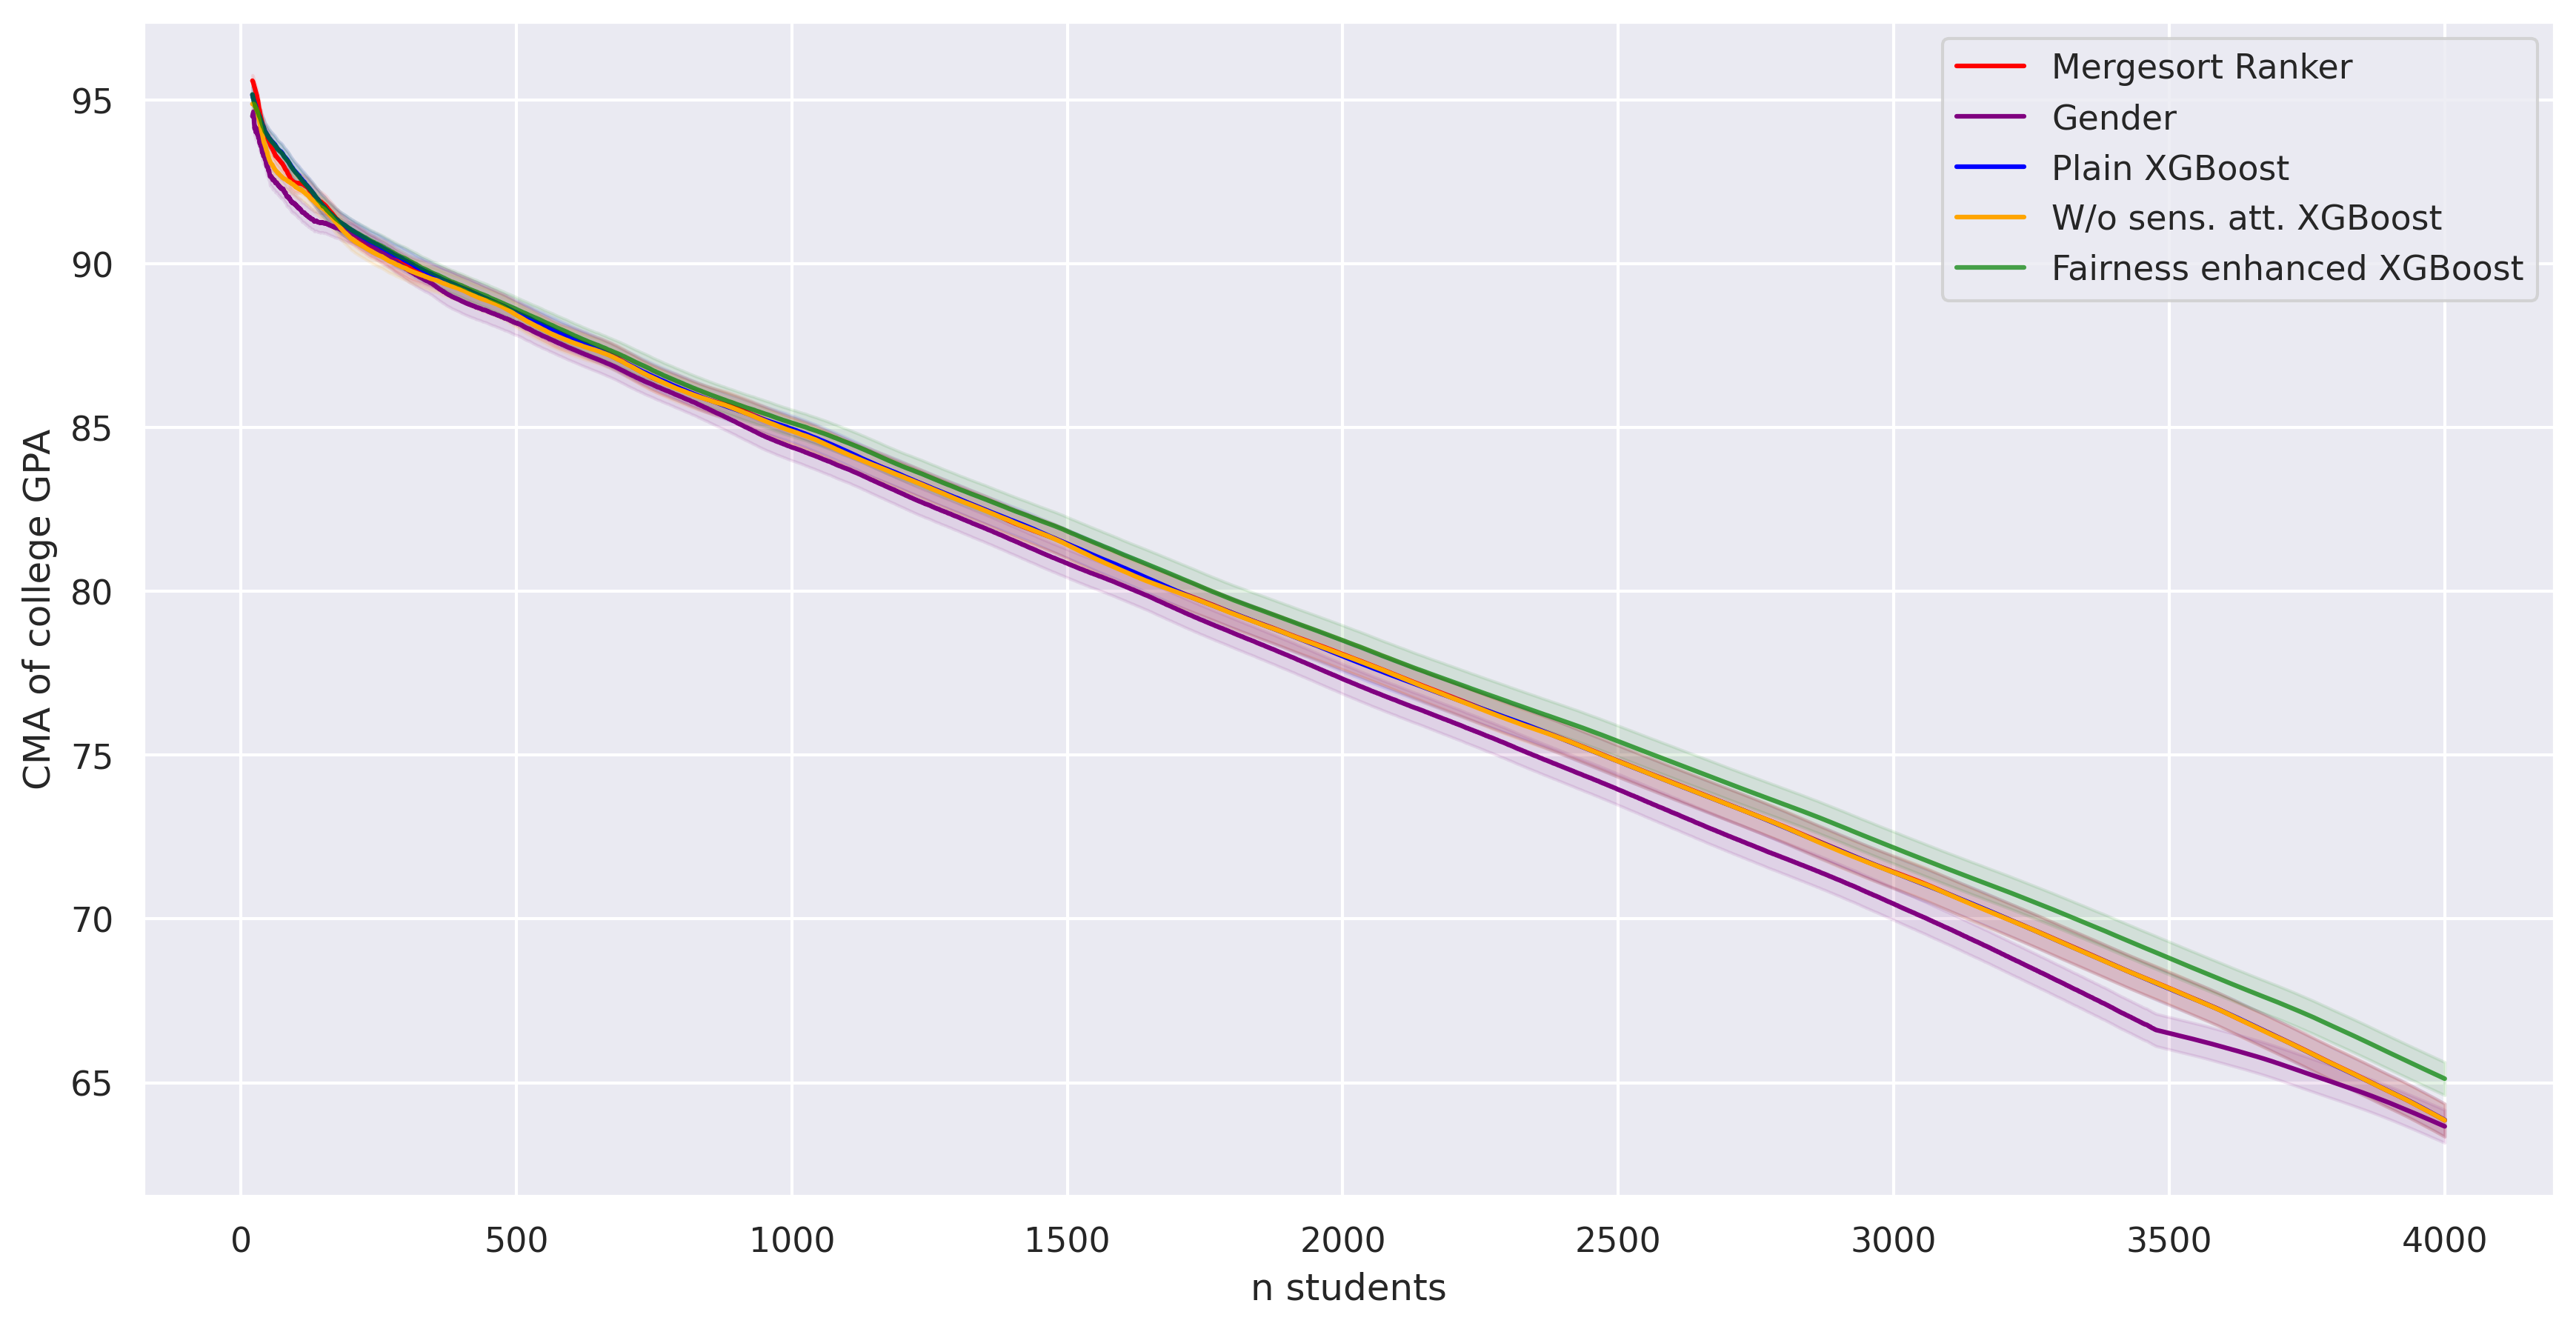

In [56]:
# xgboost 200
k=20
l=4000


# random
# sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")


# Mergesort and gendersort rankers
sns.lineplot(x="n_students", y="incr_col_mean", data=df_sort_BIG[k:l], color="red")
plt.fill_between("n_students", "lower_std", "upper_std",data=df_sort_BIG[k:l], alpha=0.1, color="red")

sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df_BIG[k:l], color="purple")
plt.fill_between("n_students", "lower_std", "upper_std",data=gender_df_BIG[k:l], alpha=0.1, color="purple")


# XGBoosts
sns.lineplot(data=Merged_PLAIN[k:l], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[k:l], alpha=0.1, color="blue")

sns.lineplot(data=Merged_WO[k:l], x="n_students", y="incr_col_mean",  color="orange" , ci="sd")
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_WO[k:l], alpha=0.1, color="orange")

sns.lineplot(data=Merged_FAIR[k:l], x="n_students", y="incr_col_mean",  color="green" , ci="sd", alpha=0.7)
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_FAIR[k:l], alpha=0.1, color="green")

# GT["incr_col_mean"] = GT['y_test'].expanding().mean()
# sns.lineplot(data=GT[k:l], x="rank_y_test", y="incr_col_mean",  color="black" , ci="sd", alpha=0.7)



#plot
plt.xlabel('n students')
plt.ylabel('CMA of college GPA')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
plt.legend([ "Mergesort Ranker",'Gender',"Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")
#plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")

plt.show()
# plt.savefig('ALL_utility.png')

## Kruskal Wallis test


In [57]:
GT = pd.read_csv('GT.csv')

In [58]:
from scipy import stats
k=0
l=500

gt = GT["y_test"][k:l]
plainxgb = Merged_PLAIN["COL_GRADE_AVG"][k:l]
woxgb = Merged_WO["COL_GRADE_AVG"][k:l]
fairxgb =  Merged_FAIR["COL_GRADE_AVG"][k:l]
mergesort = df_sort_BIG["18"][k:l]
gendersort = gender_df_BIG['18_x'][k:l]


In [59]:
# #########Mergesort vs alle
# pvalues = pd.DataFrame(columns = ['Mer', 'Gen', 'Pla'])



# print('Test between merge and gender:    ' + str(stats.kruskal(mergesort, gendersort)))
# print('Test between merge and plain:   ' + str(stats.kruskal(mergesort, plainxgb)))
# print('Test between merge and w/o:     ' + str(stats.kruskal(mergesort, woxgb)))
# print('Test between merge and fair:      ' + str(stats.kruskal(mergesort, fairxgb)))

# # print('Test all models:              ' + str(stats.kruskal(woxgb, fairxgb, plainxgb,mergesort, gendersort)))
# Mer = []
# Mer.append(stats.kruskal(mergesort, mergesort)[1])
# Mer.append(stats.kruskal(mergesort, gendersort)[1])
# Mer.append(stats.kruskal(mergesort, plainxgb)[1])
# Mer.append(stats.kruskal(mergesort, woxgb)[1])
# Mer.append(stats.kruskal(mergesort, fairxgb)[1])
# pvalues['Mer'] = Mer

# Gen = []
# Gen.append(stats.kruskal(gendersort, mergesort)[1])
# Gen.append(stats.kruskal(gendersort, gendersort)[1])
# Gen.append(stats.kruskal(gendersort, plainxgb)[1])
# Gen.append(stats.kruskal(gendersort, woxgb)[1])
# Gen.append(stats.kruskal(gendersort, fairxgb)[1])
# pvalues['Gen'] = Gen

In [60]:

# print('Test between mergesort and gendersort:     ' + str(stats.kruskal(mergesort, gendersort)))
# print('Test between mergesort and fair:     ' + str(stats.kruskal(mergesort, fairxgb)))
# print('Test between mergesort and plain:     ' + str(stats.kruskal(mergesort, plainxgb)))

# print('Test between gendersort and fair:     ' + str(stats.kruskal(gendersort, fairxgb))) 
# print('Test between gendersort and plain:     ' + str(stats.kruskal(gendersort, plainxgb))) 




The null hypothesis states that the population medians for these groups are all equal.
The p-value is larger than alpha = 0.05, and therefore we can not reject the hypotesis, that the medians are equal. 


P-value ≤ α: The differences between some of the medians are statistically significant:
significant difference between 

In [61]:

pvalues1=pd.read_csv('pvalues1.csv')
pvalues2=pd.read_csv('pvalues2.csv') 
pvalues3=pd.read_csv('pvalues3.csv')
pvalues4=pd.read_csv('pvalues4.csv') 
pvalues5=pd.read_csv('pvalues5.csv') 

MER_pvalues = pd.DataFrame(columns=['100','200','300','400','500'])
MER_pvalues['100']=pvalues1['Mer']
MER_pvalues['200']=pvalues2['Mer']
MER_pvalues['300']=pvalues3['Mer']
MER_pvalues['400']=pvalues4['Mer']
MER_pvalues['500']=pvalues5['Mer']

GEN_pvalues = pd.DataFrame(columns=['100','200','300','400','500'])
GEN_pvalues['100']=pvalues1['Gen']
GEN_pvalues['200']=pvalues2['Gen']
GEN_pvalues['300']=pvalues3['Gen']
GEN_pvalues['400']=pvalues4['Gen']
GEN_pvalues['500']=pvalues5['Gen']

PLA_pvalues = pd.DataFrame(columns=['100','200','300','400','500'])
PLA_pvalues['100']=pvalues1['Pla']
PLA_pvalues['200']=pvalues2['Pla']
PLA_pvalues['300']=pvalues3['Pla']
PLA_pvalues['400']=pvalues4['Pla']
PLA_pvalues['500']=pvalues5['Pla']

WO_pvalues = pd.DataFrame(columns=['100','200','300','400','500'])
WO_pvalues['100']=pvalues1['Wo']
WO_pvalues['200']=pvalues2['Wo']
WO_pvalues['300']=pvalues3['Wo']
WO_pvalues['400']=pvalues4['Wo']
WO_pvalues['500']=pvalues5['Wo']
FAI_pvalues = pd.DataFrame(columns=['100','200','300','400','500'])
FAI_pvalues['100']=pvalues1['Fai']
FAI_pvalues['200']=pvalues2['Fai']
FAI_pvalues['300']=pvalues3['Fai']
FAI_pvalues['400']=pvalues4['Fai']
FAI_pvalues['500']=pvalues5['Fai']

MER_pvalues=MER_pvalues.rename(index={1:'Gendersort', 2:'Plain xgb',3:'W/o sens. xgb',4:'Fairness xgb'}).drop([0], axis=0)
GEN_pvalues=GEN_pvalues.rename(index={0:'Mergesort',1:'Gendersort', 2:'Plain xgb',3:'W/o sens. xgb',4:'Fairness xgb'}).drop(['Gendersort'], axis=0)
PLA_pvalues=PLA_pvalues.rename(index={0:'Mergesort',1:'Gendersort', 2:'Plain xgb',3:'W/o sens. xgb',4:'Fairness xgb'}).drop(['Plain xgb'], axis=0)
WO_pvalues=WO_pvalues.rename(index={0:'Mergesort',1:'Gendersort', 2:'Plain xgb',3:'W/o sens. xgb',4:'Fairness xgb'}).drop(['W/o sens. xgb'], axis=0)
FAI_pvalues=FAI_pvalues.rename(index={0:'Mergesort',1:'Gendersort', 2:'Plain xgb',3:'W/o sens. xgb',4:'Fairness xgb'}).drop(['Fairness xgb'], axis=0)


MER_pvalues = MER_pvalues.T
GEN_pvalues = GEN_pvalues.T
PLA_pvalues = PLA_pvalues.T
WO_pvalues = WO_pvalues.T
FAI_pvalues = FAI_pvalues.T



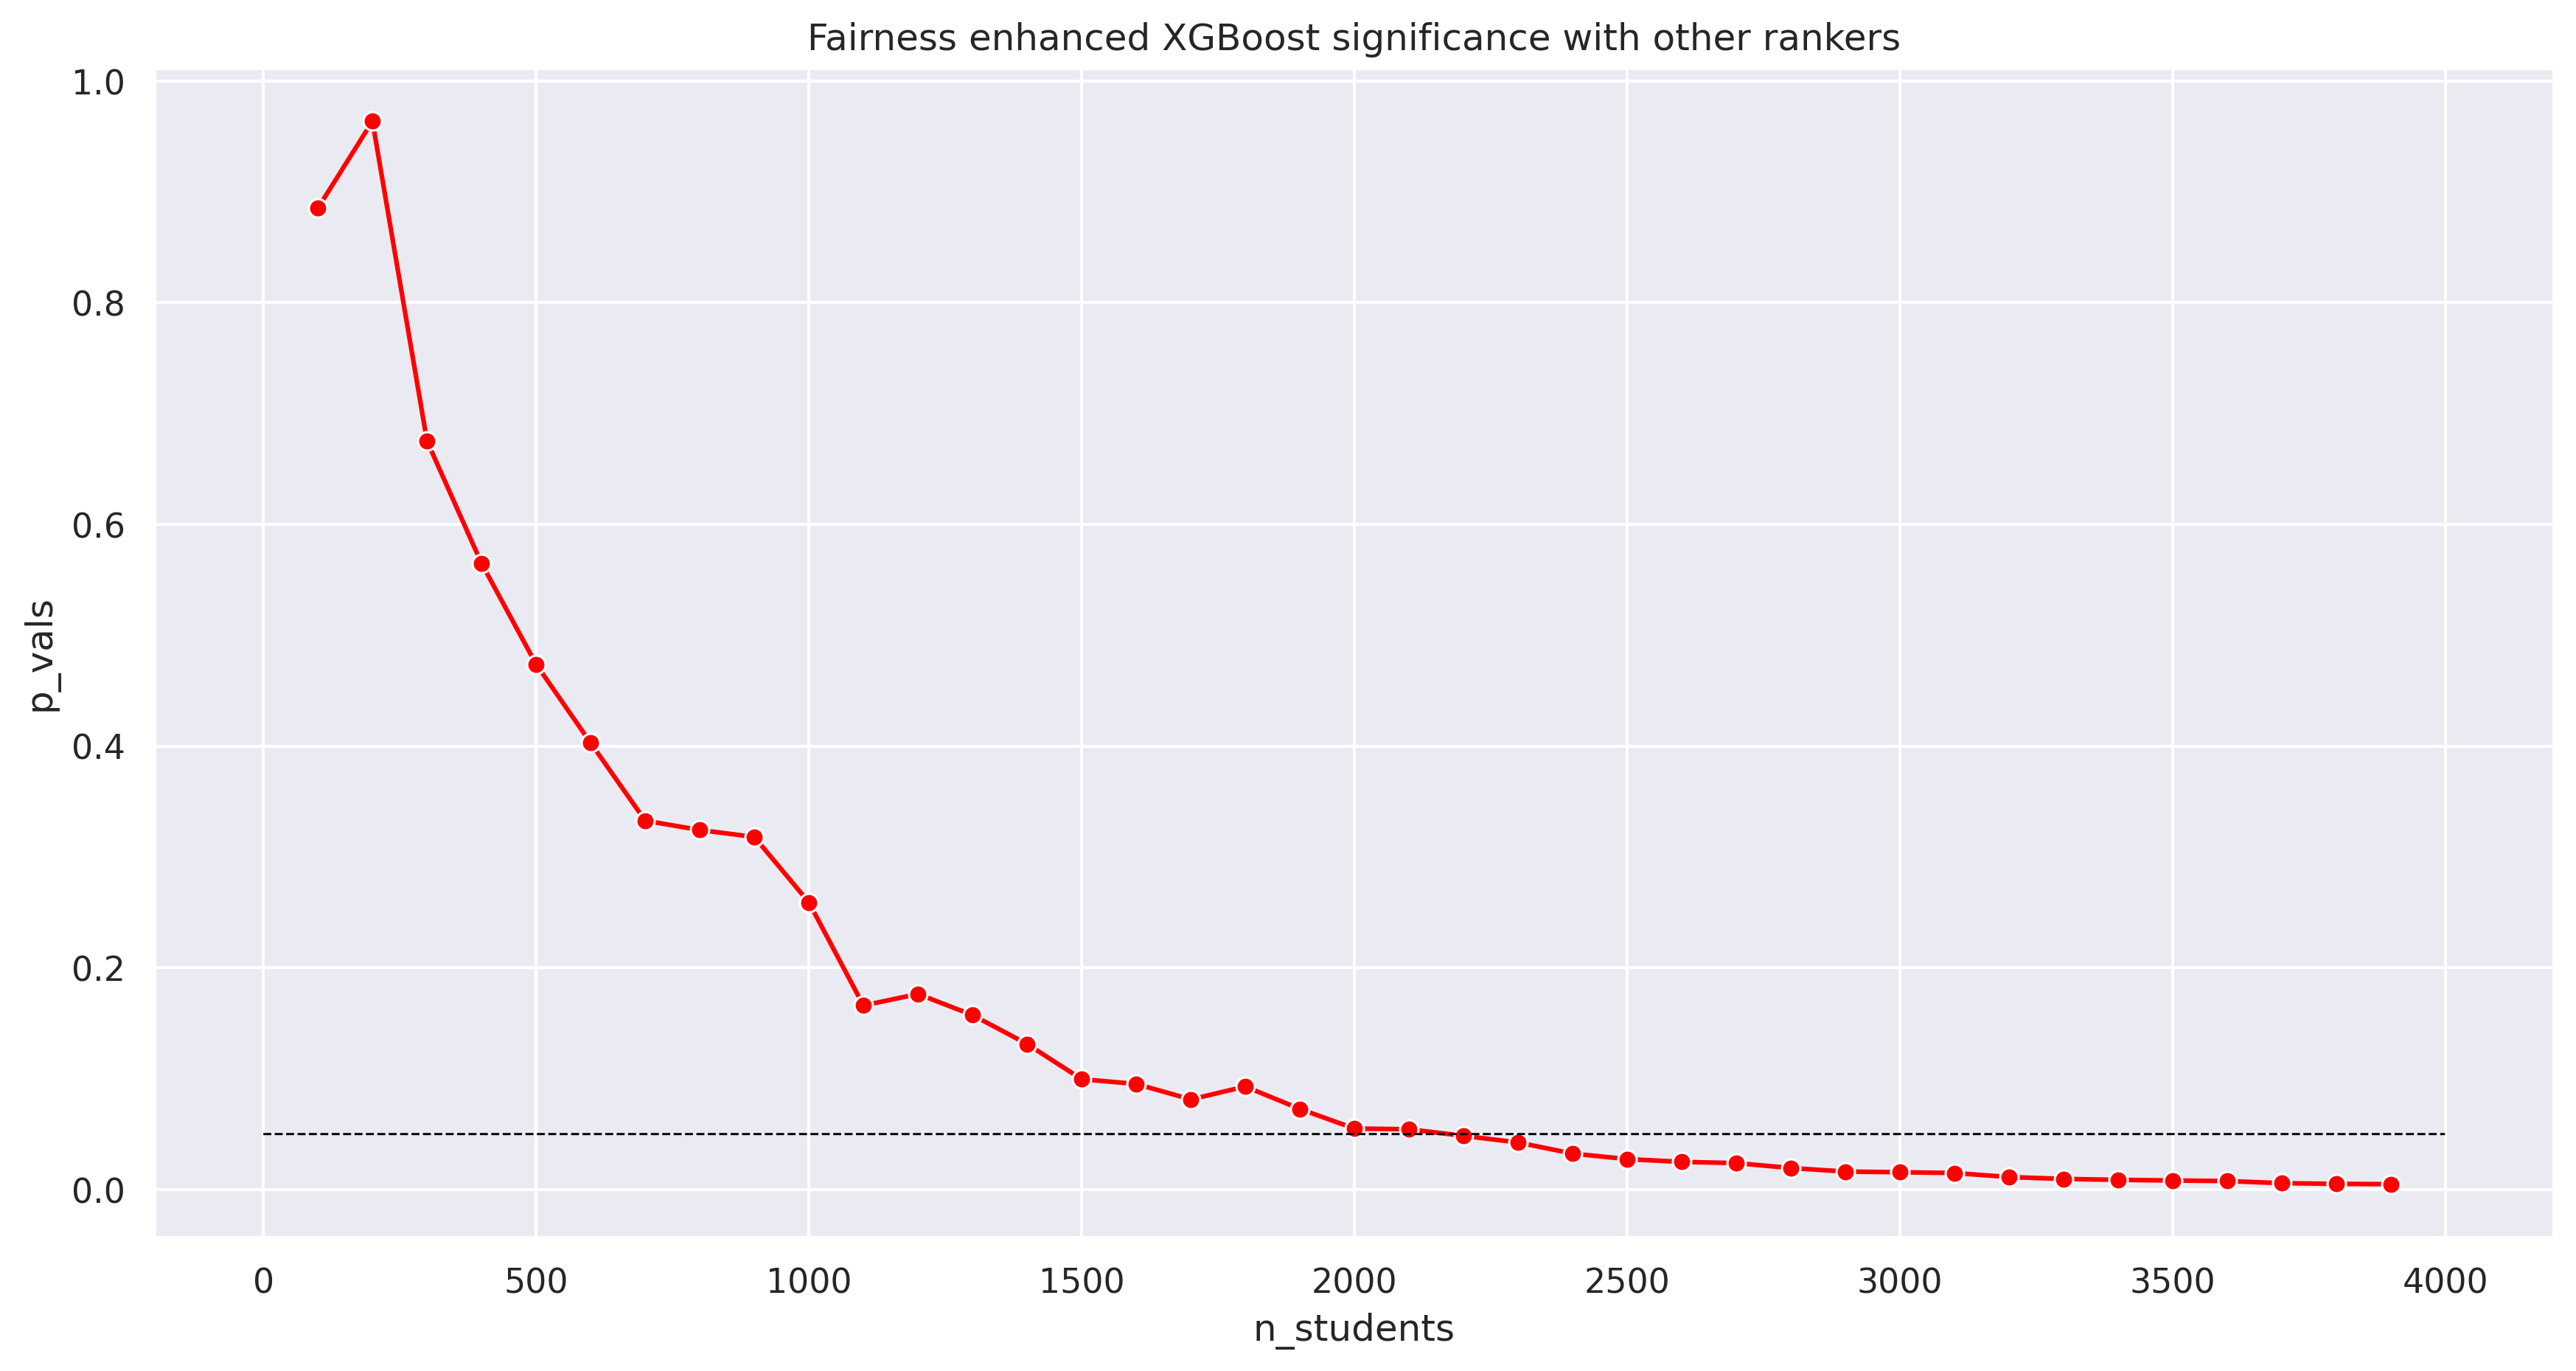

In [62]:
liste = []
for l in range(0,4000,100):
    plainxgb=Merged_PLAIN["COL_GRADE_AVG"][k:l]
    fairxgb =  Merged_FAIR["COL_GRADE_AVG"][k:l]
    liste.append(stats.kruskal(plainxgb, fairxgb)[1])
len(liste)
indexxx = np.arange(0,4000,100)

fair_plain = pd.DataFrame(columns=['n_students','p_vals'])
fair_plain['n_students']=indexxx
fair_plain['p_vals'] = liste

colors = ['red', "purple",'blue','orange']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fair_plain, x='n_students',y='p_vals', linestyle='-',marker='o')
X_plot = np.arange(0, 4000, 1)
Y_plot = 0.05+X_plot*0
plt.plot(X_plot, Y_plot, color='black', linewidth=0.7,linestyle='--')
plt.title('Fairness enhanced XGBoost significance with other rankers')
plt.show()

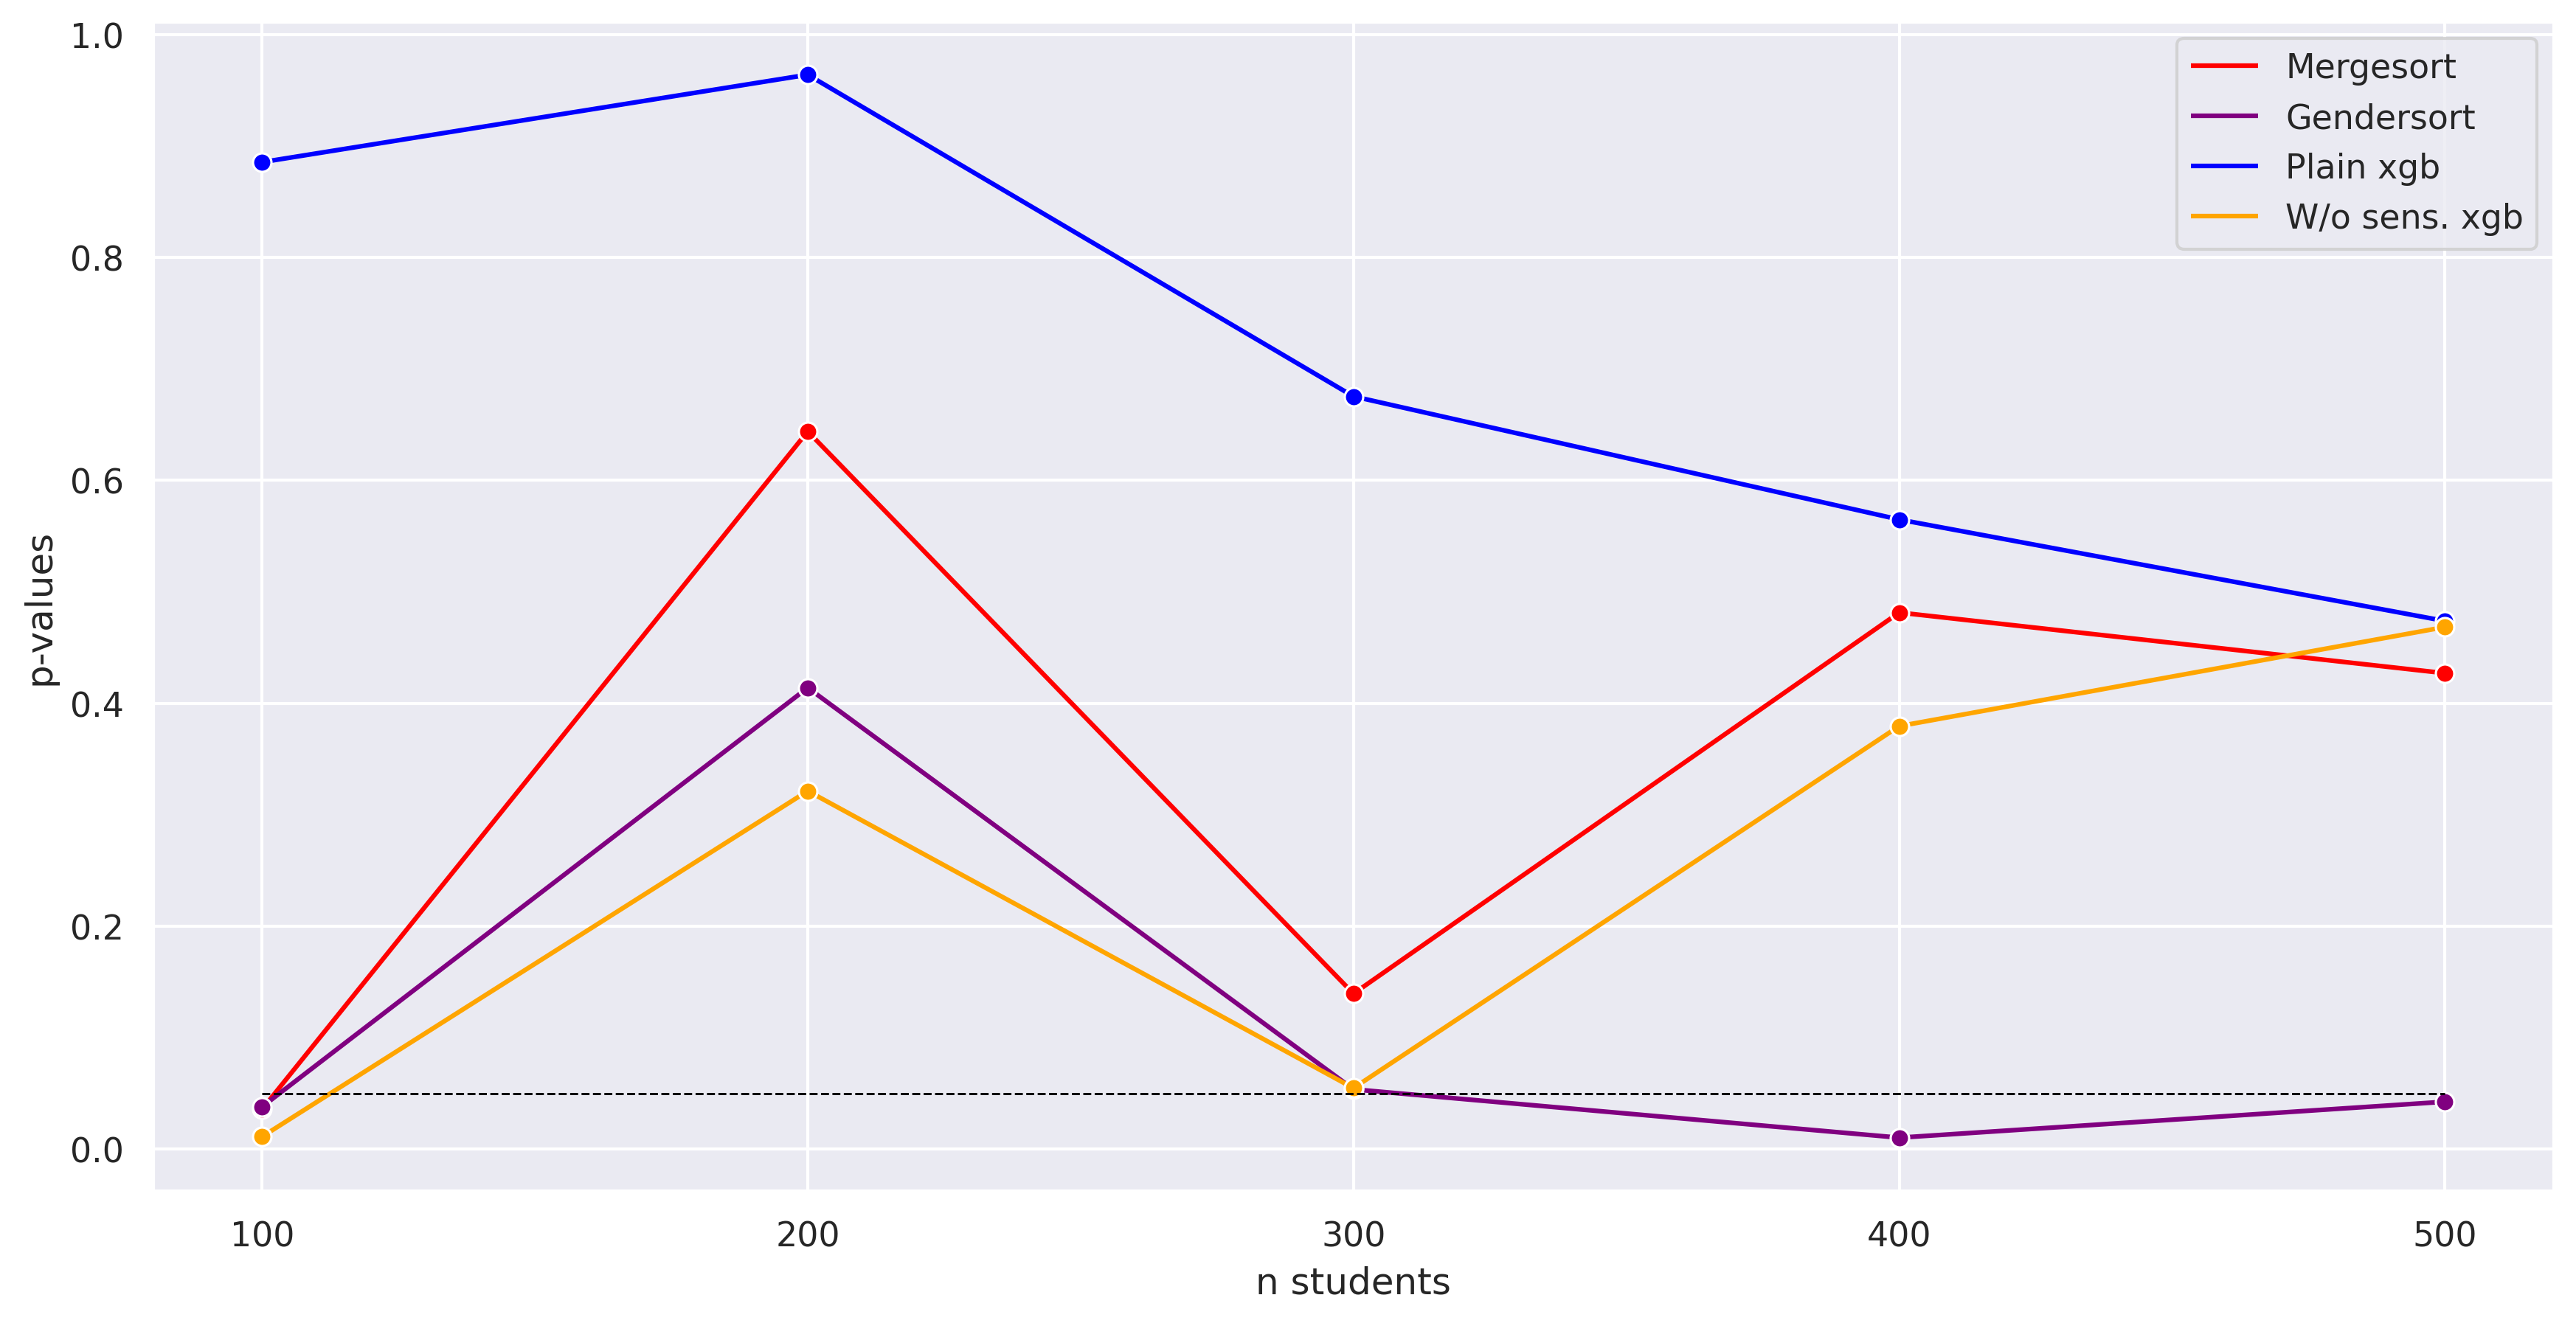

In [63]:
sns.lineplot(data=FAI_pvalues,linestyle='-', marker='o', palette = customPalette, dashes=[(100,0),(10,0),(10,0),(10,0)])
X_plot = np.arange(0, 5, 1)
Y_plot = 0.05+X_plot*0
plt.plot(X_plot, Y_plot, color='black', linewidth=0.7, linestyle='--')
plt.xlabel('n students')
plt.ylabel('p-values')

# plt.title('Plain XGBoost significance with other rankers')
plt.show()

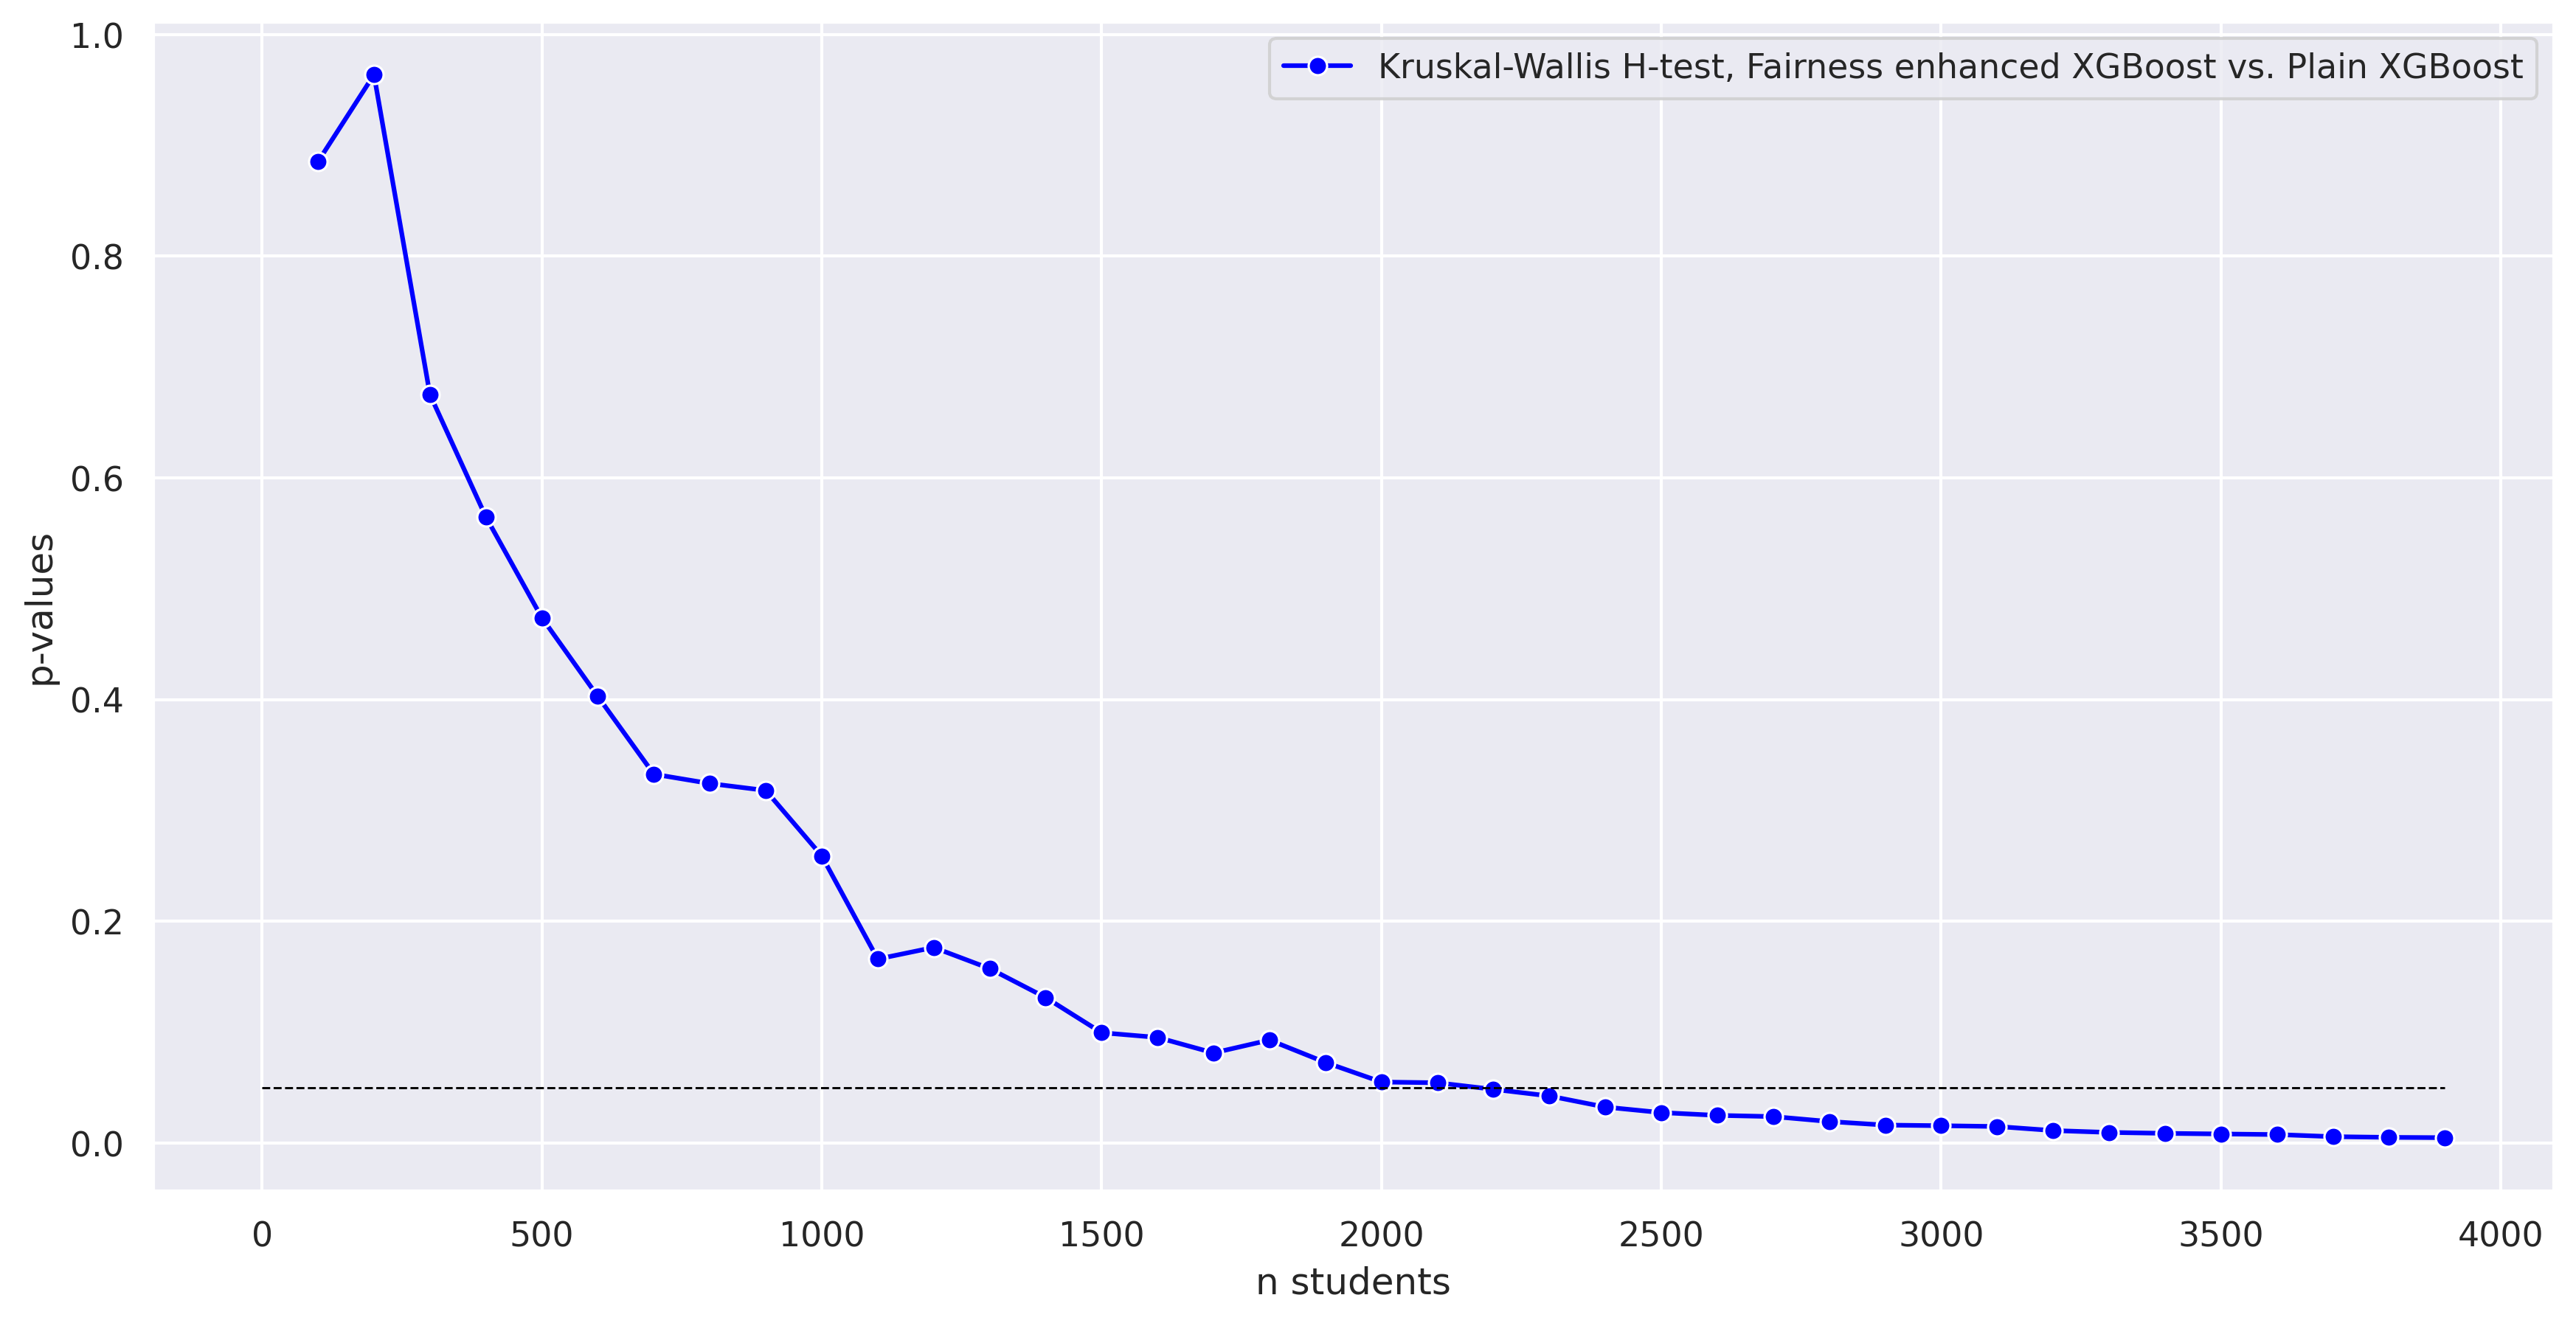

In [64]:

sns.lineplot(y=fair_plain['p_vals'] ,x=fair_plain['n_students'],linestyle='-',color='blue', marker='o', dashes=[(100,0),(10,0),(10,0),(10,0)])
X_plot = np.arange(0,4000,100)
X_plot = fair_plain.n_students

Y_plot = 0.05+X_plot*0
plt.plot(X_plot, Y_plot, color='black', linewidth=0.7, linestyle='--')

plt.xlabel('n students')
plt.ylabel('p-values')
# plt.title('Plain XGBoost significance with other rankers')
plt.legend(["Kruskal-Wallis H-test, Fairness enhanced XGBoost vs. Plain XGBoost"], loc ="upper right")

plt.show()
# Mangler her at plotte p-værdierne !!!!!!!!! TODO
# sns.histplot(data=Merged_PLAIN[0:500],  x="COL_GRADE_AVG")
# sns.histplot(data=GT[:500],  x="y_test",color='red', alpha=0.3 )

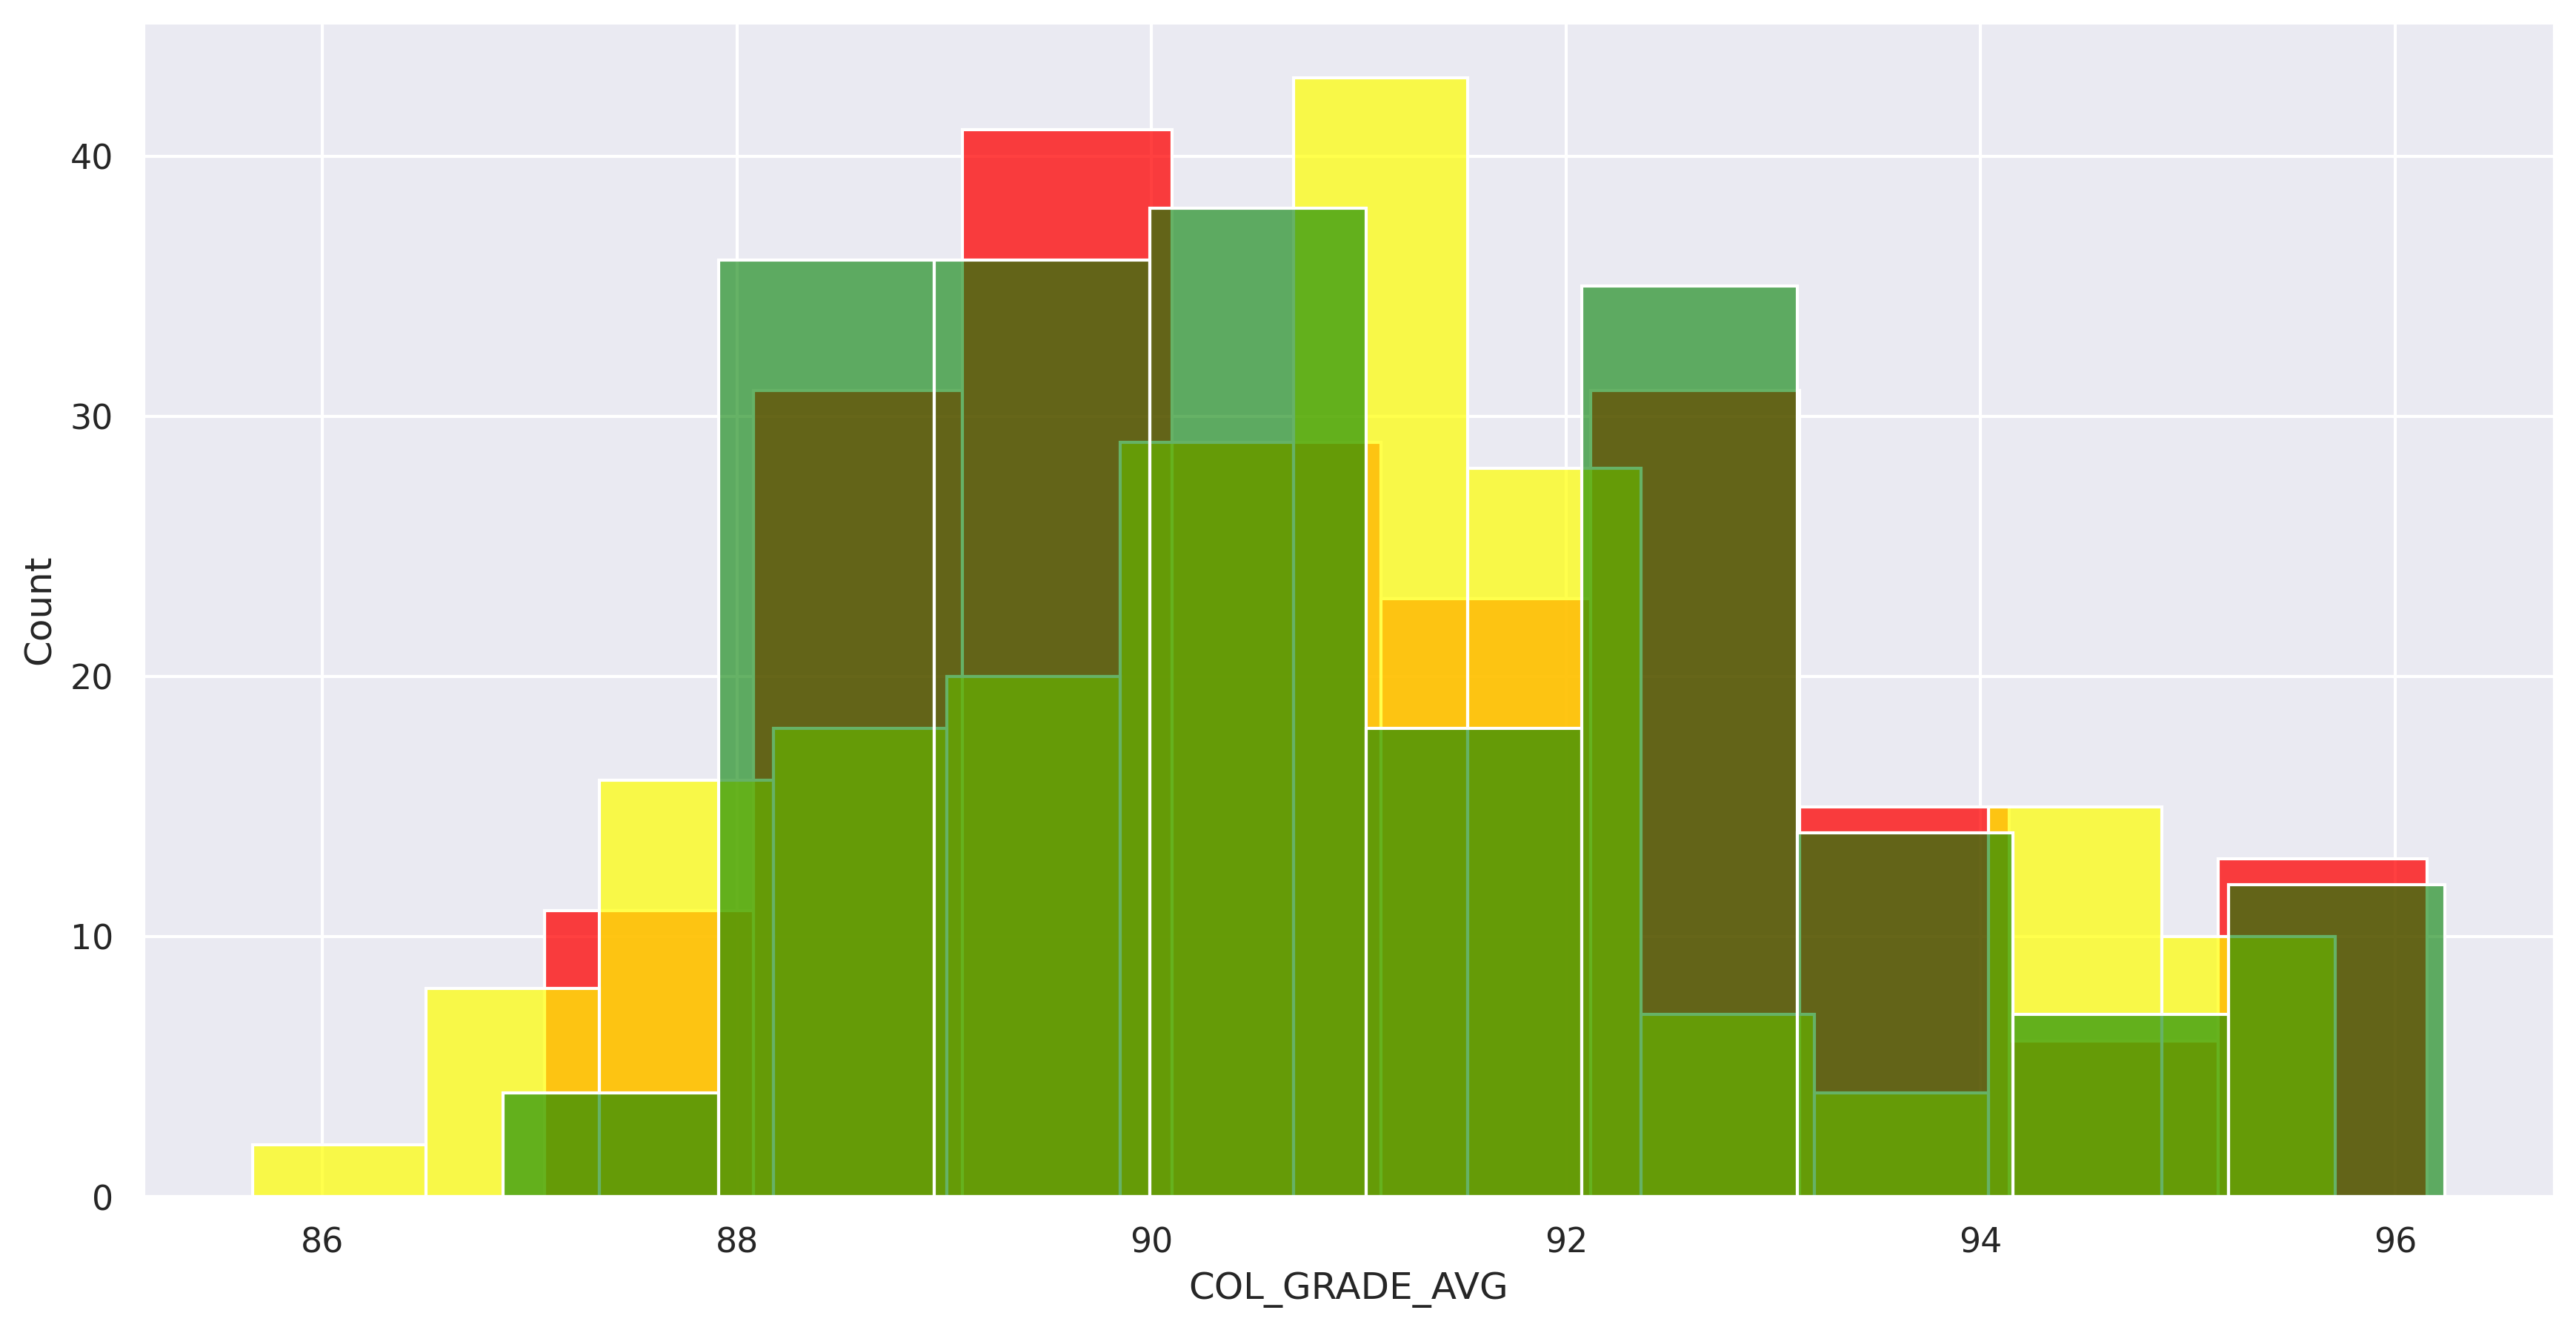

In [65]:
sns.histplot(data=Merged_PLAIN[0:200],  x="COL_GRADE_AVG")
# plt.show()

# sns.histplot(data=GT[:500],  x="y_test",color='red', alpha=0.3 )


# plt.show()
sns.histplot(data=Merged_WO[0:200],  x="COL_GRADE_AVG", color='yellow', alpha=0.7)
# plt.show()

sns.histplot(data=Merged_FAIR[0:200],  x="COL_GRADE_AVG", color='green', alpha=0.6)

plt.show()




# Mergesort re-ranked with all*

In [66]:
df_fair_TWO__ = pd.read_csv('re_ranked_merge_NY_25_prefix.csv') # denne er på 5 procent

# GUDF = pd.read_csv('GUDF.csv')
# GUDF_1 = GUDF.copy()
# replaceing = {'Stratum_1':1, 'Stratum_2':2, 'Stratum_3':3,'Stratum_4':4, 'Stratum_5':5, 'Stratum_6':6, '0':0}
# GUDF_1 = GUDF_1.replace({'STRATUM':replaceing})

# import numpy as np
# Splitte_FAIR__ = np.array_split(df_fair_TWO__, 200)
# GUDF_1['Idx'] = GUDF_1['Unnamed: 0'] 
# Splitte_FAIR__ = Splitte_FAIR__.rename(columns={'Unnamed: 0.1':'Idx'})

Splitte_FAIR__ = Splitte_FAIR


In [67]:

# MERGESORT HERUNDER PÅ BIG 
Merged_FAIR__ = pd.DataFrame()
for i in range(200):
    Splitte_FAIR__[i]= Splitte_FAIR__[i].sort_values(by="Preds", ascending=False, kind="mergesort")
    Splitte_FAIR__[i] = Splitte_FAIR__[i].merge(GUDF_1[['Idx','COL_GRADE_AVG','STRATUM']], on='Idx')
    Splitte_FAIR__[i]= Splitte_FAIR__[i].reset_index()
    Merged_FAIR__ = Merged_FAIR__.append(Splitte_FAIR__[i])

In [68]:
Merged_FAIR_use_std = Merged_FAIR.copy()
Merged_FAIR =  Merged_FAIR.groupby('index').mean()
Merged_FAIR_std =  Merged_FAIR_use_std.groupby('index').std()/np.sqrt(200)


#add exp. mean
# Merged_FAIR = Merged_FAIR.sort_values('Preds',ascending=False)
Merged_FAIR["incr_col_mean"] = Merged_FAIR['COL_GRADE_AVG'].expanding().mean()
#Merged_FAIR_std["incr_col_error"] = Merged_FAIR_std['COL_GRADE_AVG'].expanding().mean()
#Merged_FAIR["incr_stratum"] = Merged_FAIR['STRATUM'].expanding().mean()

Merged_FAIR["n_students"] = range(1,len(Merged_FAIR)+1)


#add exp. std
Merged_FAIR["incr_half_std"] = 0.5*Merged_FAIR_std["COL_GRADE_AVG"] #0.5 of std to plot on both sides of mean
Merged_FAIR["lower_std"] = Merged_FAIR["incr_col_mean"] - Merged_FAIR["incr_half_std"]
Merged_FAIR["upper_std"] = Merged_FAIR["incr_col_mean"] + Merged_FAIR["incr_half_std"]

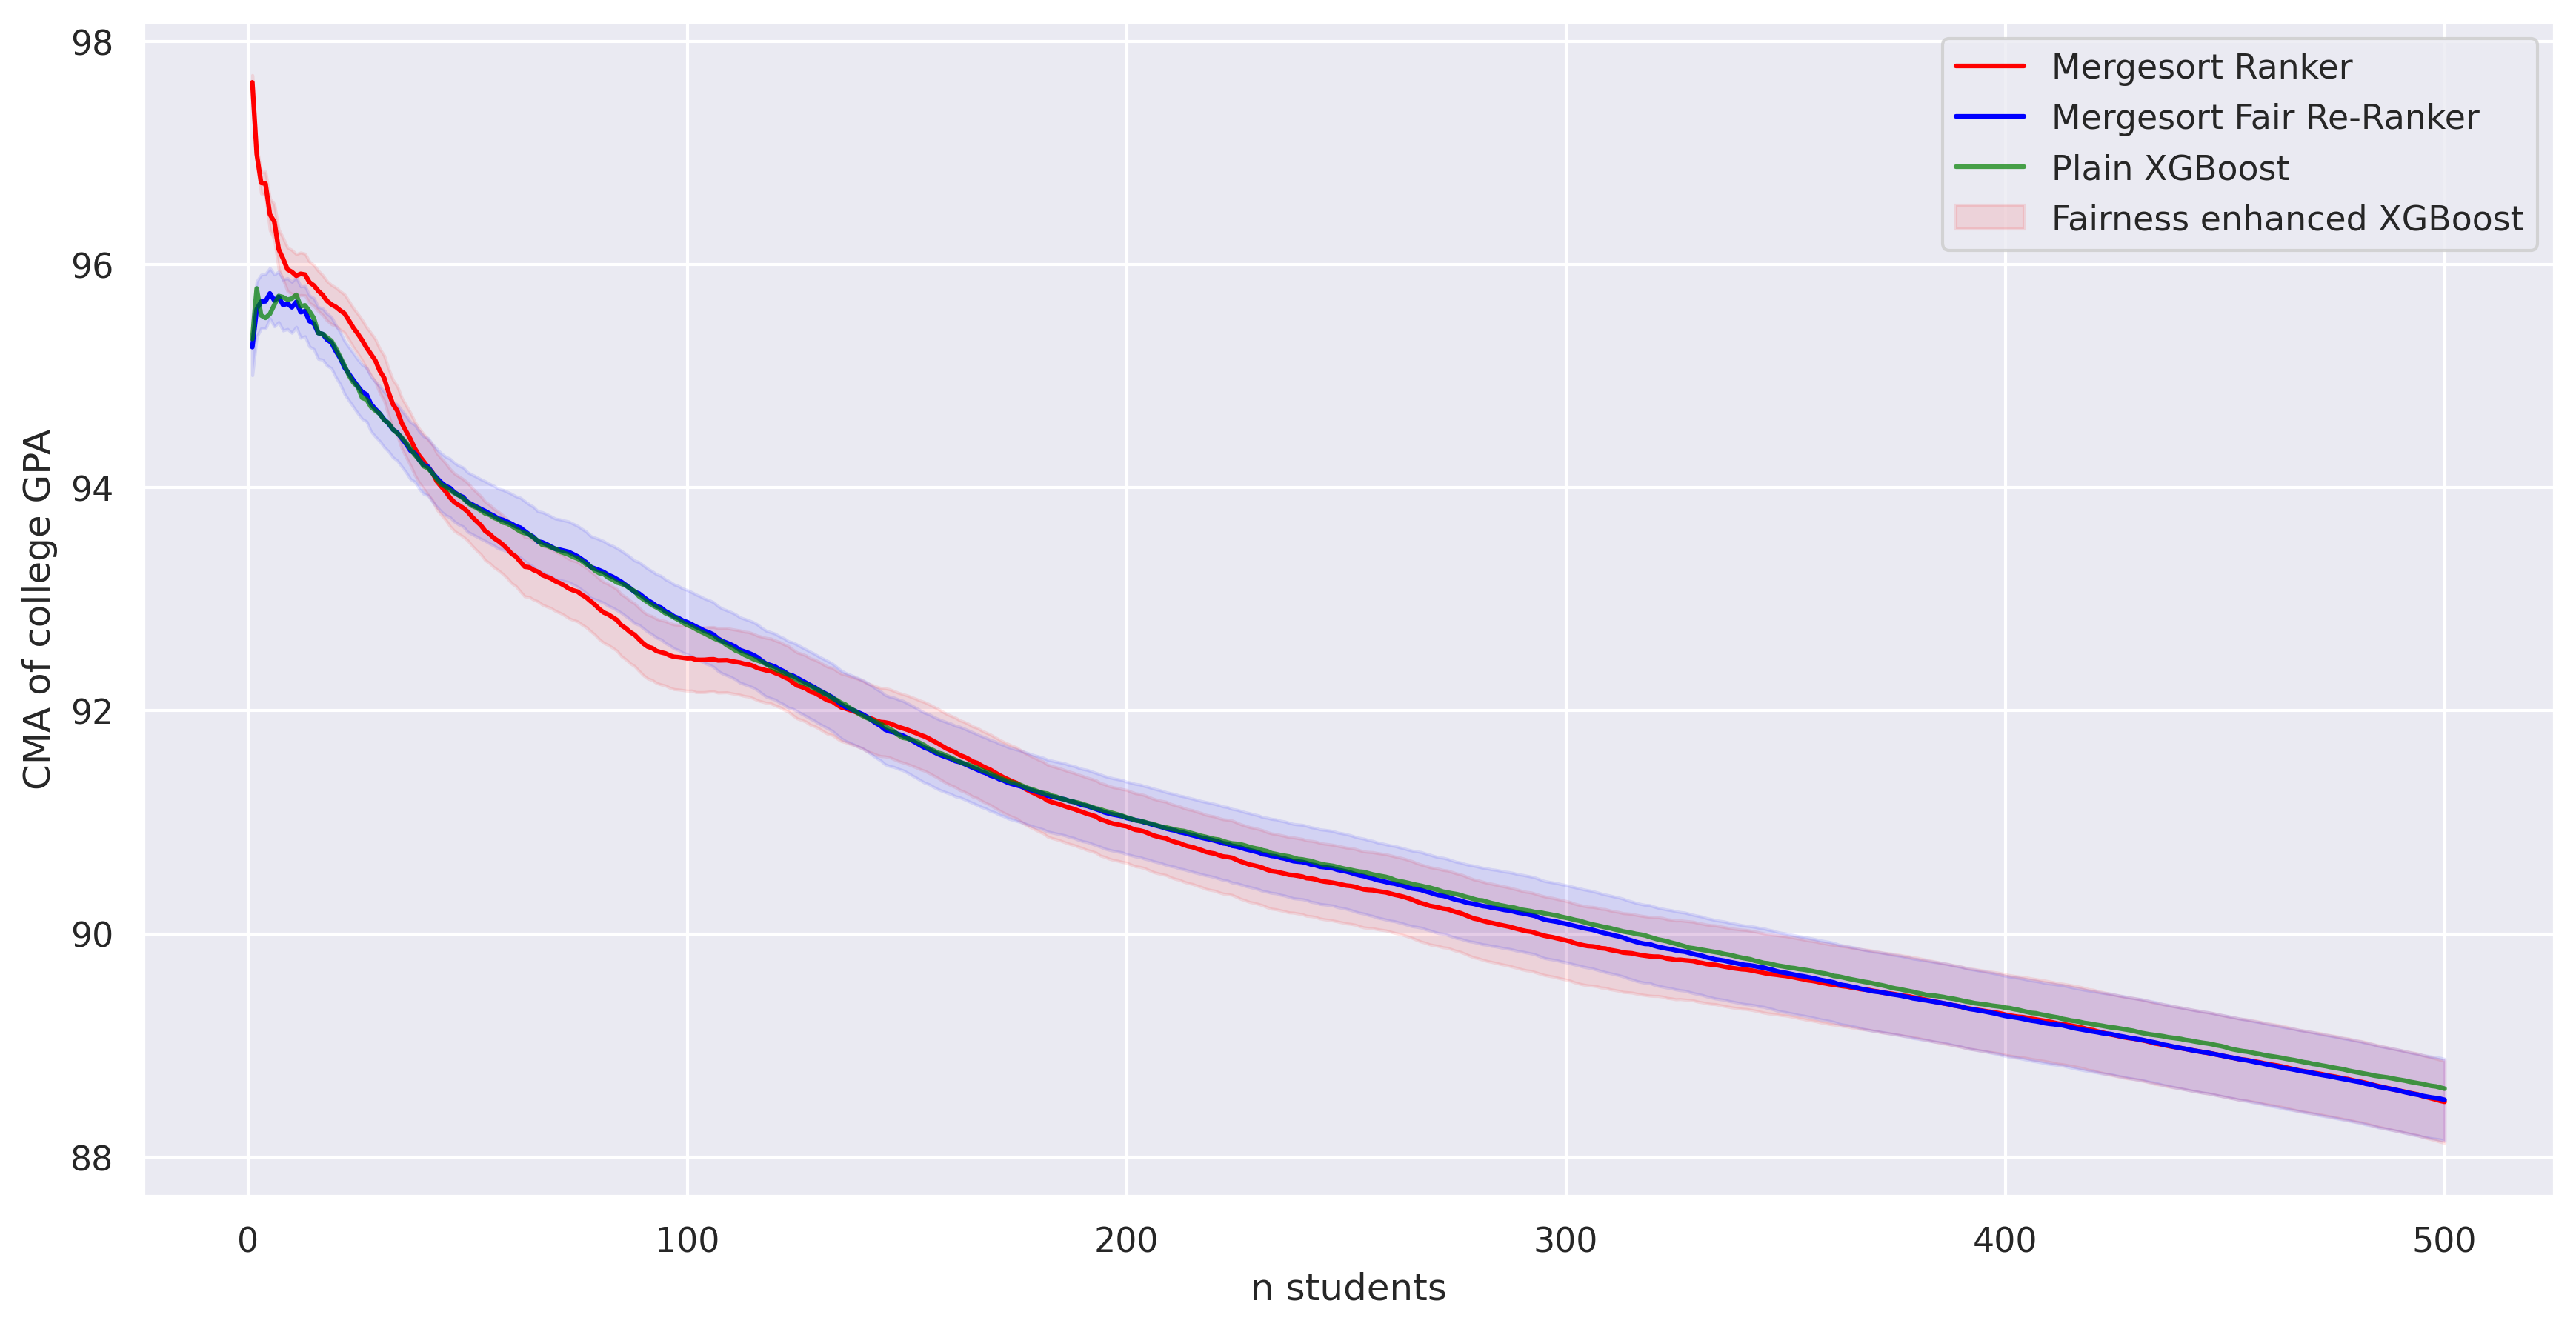

In [69]:
# xgboost 200
k=0
l=500

# Mergesort and gendersort rankers
sns.lineplot(x="n_students", y="incr_col_mean", data=df_sort_BIG[k:l], color="red")
plt.fill_between("n_students", "lower_std", "upper_std",data=df_sort_BIG[k:l], alpha=0.1, color="red")




#XGBoosts
sns.lineplot(data=Merged_PLAIN[k:l], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_PLAIN[k:l], alpha=0.1, color="blue")

sns.lineplot(data=Merged_FAIR[k:l], x="n_students", y="incr_col_mean",  color="green" , ci="sd", alpha=0.7)
plt.fill_between("n_students", "lower_std", "upper_std",data=Merged_FAIR[k:l], alpha=0.1, color="green")


#random
#sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")

#plot
plt.xlabel('n students')
plt.ylabel('CMA of college GPA')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
#plt.title('Utility of models - College GPA, all rankers')
plt.legend(["Mergesort Ranker", "Mergesort Fair Re-Ranker", "Plain XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")
# plt.legend(["Mergesort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")

plt.show()